# インポート

In [117]:
#インポート文
import numpy as np
import pandas as pd

import pydata_google_auth
from google.cloud import bigquery 

# BigQueryからデータの読み込み

In [118]:
credentials = pydata_google_auth.get_user_credentials(
    ['https://www.googleapis.com/auth/bigquery'],
)
client = bigquery.Client(project='keiba-381006', credentials=credentials)

In [119]:
race_query = '''
    SELECT * 
    FROM satsuki.race_table
    '''
race_df = client.query(race_query).to_dataframe()
race_df.head(1)

,race_id,race_round,race_title,weather,ground_status,date,where_racecourse,total_horse_number,frame_number_first,horse_number_first,frame_number_second,horse_number_second,frame_number_third,horse_number_third,tansyo,hukusyo_first,hukusyo_second,hukusyo_third,wakuren,umaren,wide_1_2,wide_1_3,wide_2_3,umatan,renhuku3,rentan3,race_rank,is_obstacle,ground_type,is_left_right_straight,distance,datetime
0,201105020211,11,第71回皐月賞(G1),1,1,2011-04-24,5,18,6,12,2,4,1,2,1080,300,130,550,570,1260,630,3840,1330,3740,9220,55450,3,0,2,1,2000,2011-04-24 15:40:00+00:00


In [120]:
horse_query = '''
    SELECT * 
    FROM satsuki.horse_table 
    '''
horse_df = client.query(horse_query).to_dataframe()
pd.set_option('display.max_columns', 100)
horse_df.head(1)

,race_id,rank,frame_number,horse_number,horse_id,burden_weight,rider_id,goal_time,goal_time_dif,half_way_rank,last_time,odds,popular,horse_weight,tamer_id,owner_id,is_down,age,sex,horse_weight_dif,burden_weight_rate,avg_velocity
0,202206030811,7,3,6,2019103662,57.0,5386,120.3,0.2,15.5,34,350,10,494,1176,195031,0,3,0,-4,0.115385,16.625104


In [121]:
horse_info_query = '''
    SELECT * 
    FROM satsuki.horse_info_table
    '''
horse_info_df = client.query(horse_info_query).to_dataframe()
pd.set_option('display.max_columns', 100)
horse_info_df.head(1)

,horse_id,bday,tamer_id,owner_id,producer_id,production_area,lifetime_record,wined_race_title,inbreeding_1,inbreeding_2,father,faths_father,faths_mother,mother,moths_father,moths_mother
0,2003110015,2003-03-10,00427,582008,60881.0,米,31戦4勝 [4-2-3-22],200606040211,2005110047,None,000a0000d3,000a000e04,000a000491,000a0101b5,000a001607,000a0085c1


In [122]:
horse_race_query = '''
    SELECT * 
    FROM satsuki.horse_race_table
    '''
horse_race_df = client.query(horse_race_query).to_dataframe()
pd.set_option('display.max_columns', 100)
horse_race_df.head(1)

,date,where_racecourse,weather,race_round,race_title,race_id,total_horse_number,frame_number,horse_number,odds,popular,rank,rider_id,burden_weight,ground_status,goal_time,goal_time_dif,half_way_rank,pace,last_time,horse_weight,wined_horse_id,horse_id,target_race_id,race_rank,horse_weight_dif,is_down,burden_weight_rate,is_obstacle,ground_type,is_left_right_straight,distance,race_date
0,2005-10-30,5,1,7,くるみ賞(500万下),200505040807,9,4,4,25,1,1,700,55.0,1,83.0,0.0,5.5,35.2,34,460.0,2003110138,2003101859,200606030811,0,6.0,0,0.119565,0,2,0,1400,2006-04-16


In [123]:
#dfのマージ
df_marged = pd.DataFrame()
df_marged = pd.merge(horse_df, race_df, on='race_id', how='left')
df_marged = pd.merge(df_marged, horse_info_df, on='horse_id', how='left')
#df_marged = pd.merge(df_marged, horse_race_df, on='horse_id', how='left')
#過去のレースは1対多の関係にあるので、過去のレースの傾向から、今回のレースの調子を測る
df_marged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282 entries, 0 to 281
Data columns (total 68 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   race_id                 282 non-null    Int64              
 1   rank                    282 non-null    Int64              
 2   frame_number            282 non-null    Int64              
 3   horse_number            282 non-null    Int64              
 4   horse_id                282 non-null    Int64              
 5   burden_weight           282 non-null    float64            
 6   rider_id                282 non-null    Int64              
 7   goal_time               282 non-null    float64            
 8   goal_time_dif           282 non-null    float64            
 9   half_way_rank           282 non-null    float64            
 10  last_time               282 non-null    Int64              
 11  odds                    282 non-null    Int64

# EDA

## race_dfの探索

### 全体

In [124]:
pd.set_option('display.max_columns', 100)
race_df.head(1)

,race_id,race_round,race_title,weather,ground_status,date,where_racecourse,total_horse_number,frame_number_first,horse_number_first,frame_number_second,horse_number_second,frame_number_third,horse_number_third,tansyo,hukusyo_first,hukusyo_second,hukusyo_third,wakuren,umaren,wide_1_2,wide_1_3,wide_2_3,umatan,renhuku3,rentan3,race_rank,is_obstacle,ground_type,is_left_right_straight,distance,datetime
0,201105020211,11,第71回皐月賞(G1),1,1,2011-04-24,5,18,6,12,2,4,1,2,1080,300,130,550,570,1260,630,3840,1330,3740,9220,55450,3,0,2,1,2000,2011-04-24 15:40:00+00:00


In [125]:
race_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   race_id                 17 non-null     Int64              
 1   race_round              17 non-null     Int64              
 2   race_title              17 non-null     object             
 3   weather                 17 non-null     Int64              
 4   ground_status           17 non-null     Int64              
 5   date                    17 non-null     dbdate             
 6   where_racecourse        17 non-null     Int64              
 7   total_horse_number      17 non-null     Int64              
 8   frame_number_first      17 non-null     Int64              
 9   horse_number_first      17 non-null     Int64              
 10  frame_number_second     17 non-null     Int64              
 11  horse_number_second     17 non-null     Int64  

In [126]:
#合計の多い順にソート
null_total = race_df.isnull().sum().sort_values(ascending=False)
null_total

race_id                   0
race_round                0
distance                  0
is_left_right_straight    0
ground_type               0
is_obstacle               0
race_rank                 0
rentan3                   0
renhuku3                  0
umatan                    0
wide_2_3                  0
wide_1_3                  0
wide_1_2                  0
umaren                    0
wakuren                   0
hukusyo_third             0
hukusyo_second            0
hukusyo_first             0
tansyo                    0
horse_number_third        0
frame_number_third        0
horse_number_second       0
frame_number_second       0
horse_number_first        0
frame_number_first        0
total_horse_number        0
where_racecourse          0
date                      0
ground_status             0
weather                   0
race_title                0
datetime                  0
dtype: int64

race_dfには32個の特徴量が存在し、過去の対象レース情報が入っている  
それぞれのレースの特徴量から、レースの展開や荒れ具合などの傾向を調べると、競走馬の順位予測の助けになりそうである

### 各特徴量の説明

#### race_id

In [127]:
race_df['race_id'].unique()

<IntegerArray>
[201105020211, 202006030811, 201406030811, 201506030811, 200606030811,
 200806030811, 201306030811, 201806030811, 202106030811, 201706030811,
 201906030811, 201006030811, 201206030811, 202206030811, 200906030811,
 200706030811, 201606030811]
Length: 17, dtype: Int64

過去17回のレースのIDがInt64型で入っている  
LightGBM Rankerでgroup(検索クエリ)を作成するときに使用する

#### race_round

In [128]:
race_df['race_round'].unique()

<IntegerArray>
[11]
Length: 1, dtype: Int64

11レース目のみなので、削除する

In [129]:
race_df.drop('race_round', axis=1)

,race_id,race_title,weather,ground_status,date,where_racecourse,total_horse_number,frame_number_first,horse_number_first,frame_number_second,horse_number_second,frame_number_third,horse_number_third,tansyo,hukusyo_first,hukusyo_second,hukusyo_third,wakuren,umaren,wide_1_2,wide_1_3,wide_2_3,umatan,renhuku3,rentan3,race_rank,is_obstacle,ground_type,is_left_right_straight,distance,datetime
0,201105020211,第71回皐月賞(G1),1,1,2011-04-24,5,18,6,12,2,4,1,2,1080,300,130,550,570,1260,630,3840,1330,3740,9220,55450,3,0,2,1,2000,2011-04-24 15:40:00+00:00
1,202006030811,第80回皐月賞(G1),1,2,2020-04-19,6,18,1,1,4,7,8,16,270,140,170,690,640,660,330,2250,2610,1120,9150,26310,3,0,2,2,2000,2020-04-19 15:40:00+00:00
2,201406030811,第74回皐月賞(G1),2,1,2014-04-20,6,18,1,2,8,17,8,18,510,190,150,470,330,920,390,1990,1250,1900,7690,33490,3,0,2,2,2000,2014-04-20 15:40:00+00:00
3,201506030811,第75回皐月賞(G1),2,1,2015-04-19,6,15,2,2,3,5,4,7,460,190,150,290,780,790,390,1130,860,1530,3110,12360,3,0,2,2,2000,2015-04-19 15:40:00+00:00
4,200606030811,第66回皐月賞(G1),2,1,2006-04-16,6,18,3,5,1,2,3,6,1450,430,760,260,1000,13980,3290,1380,3000,29670,34700,273310,3,0,2,2,2000,2006-04-16 15:40:00+00:00
5,200806030811,第68回皐月賞(G1),2,1,2008-04-20,6,18,3,6,1,1,5,9,1710,430,380,150,2090,10260,2590,1050,940,20300,11230,82750,3,0,2,2,2000,2008-04-20 15:40:00+00:00
6,201306030811,第73回皐月賞(G1),1,1,2013-04-14,6,18,4,7,7,14,6,12,370,140,150,140,440,840,360,320,330,1750,1210,5920,3,0,2,2,2000,2013-04-14 15:40:00+00:00
7,201806030811,第78回皐月賞(G1),2,2,2018-04-15,6,16,4,7,7,14,5,10,1450,430,580,530,9520,12880,3250,3010,4290,23570,53410,372080,3,0,2,2,2000,2018-04-15 15:40:00+00:00
8,202106030811,第81回皐月賞(G1),1,2,2021-04-18,6,16,4,7,7,13,2,3,370,170,490,380,1150,4300,1540,1150,3560,5510,20000,82320,3,0,2,2,2000,2021-04-18 15:40:00+00:00
9,201706030811,第77回皐月賞(G1),1,1,2017-04-16,6,18,6,11,4,7,5,10,2240,650,320,1340,2380,8710,2250,16960,6770,20720,176030,1064360,3,0,2,2,2000,2017-04-16 15:40:00+00:00


#### race_title

In [130]:
race_df['race_title'].unique()

array(['第71回皐月賞(G1)', '第80回皐月賞(G1)', '第74回皐月賞(G1)', '第75回皐月賞(G1)',
       '第66回皐月賞(G1)', '第68回皐月賞(G1)', '第73回皐月賞(G1)', '第78回皐月賞(G1)',
       '第81回皐月賞(G1)', '第77回皐月賞(G1)', '第79回皐月賞(G1)', '第70回皐月賞(G1)',
       '第72回皐月賞(G1)', '第82回皐月賞(G1)', '第69回皐月賞(G1)', '第67回皐月賞(G1)',
       '第76回皐月賞(G1)'], dtype=object)

情報はなさそうなので、削除する

In [131]:
race_df.drop('race_title', axis=1)

,race_id,race_round,weather,ground_status,date,where_racecourse,total_horse_number,frame_number_first,horse_number_first,frame_number_second,horse_number_second,frame_number_third,horse_number_third,tansyo,hukusyo_first,hukusyo_second,hukusyo_third,wakuren,umaren,wide_1_2,wide_1_3,wide_2_3,umatan,renhuku3,rentan3,race_rank,is_obstacle,ground_type,is_left_right_straight,distance,datetime
0,201105020211,11,1,1,2011-04-24,5,18,6,12,2,4,1,2,1080,300,130,550,570,1260,630,3840,1330,3740,9220,55450,3,0,2,1,2000,2011-04-24 15:40:00+00:00
1,202006030811,11,1,2,2020-04-19,6,18,1,1,4,7,8,16,270,140,170,690,640,660,330,2250,2610,1120,9150,26310,3,0,2,2,2000,2020-04-19 15:40:00+00:00
2,201406030811,11,2,1,2014-04-20,6,18,1,2,8,17,8,18,510,190,150,470,330,920,390,1990,1250,1900,7690,33490,3,0,2,2,2000,2014-04-20 15:40:00+00:00
3,201506030811,11,2,1,2015-04-19,6,15,2,2,3,5,4,7,460,190,150,290,780,790,390,1130,860,1530,3110,12360,3,0,2,2,2000,2015-04-19 15:40:00+00:00
4,200606030811,11,2,1,2006-04-16,6,18,3,5,1,2,3,6,1450,430,760,260,1000,13980,3290,1380,3000,29670,34700,273310,3,0,2,2,2000,2006-04-16 15:40:00+00:00
5,200806030811,11,2,1,2008-04-20,6,18,3,6,1,1,5,9,1710,430,380,150,2090,10260,2590,1050,940,20300,11230,82750,3,0,2,2,2000,2008-04-20 15:40:00+00:00
6,201306030811,11,1,1,2013-04-14,6,18,4,7,7,14,6,12,370,140,150,140,440,840,360,320,330,1750,1210,5920,3,0,2,2,2000,2013-04-14 15:40:00+00:00
7,201806030811,11,2,2,2018-04-15,6,16,4,7,7,14,5,10,1450,430,580,530,9520,12880,3250,3010,4290,23570,53410,372080,3,0,2,2,2000,2018-04-15 15:40:00+00:00
8,202106030811,11,1,2,2021-04-18,6,16,4,7,7,13,2,3,370,170,490,380,1150,4300,1540,1150,3560,5510,20000,82320,3,0,2,2,2000,2021-04-18 15:40:00+00:00
9,201706030811,11,1,1,2017-04-16,6,18,6,11,4,7,5,10,2240,650,320,1340,2380,8710,2250,16960,6770,20720,176030,1064360,3,0,2,2,2000,2017-04-16 15:40:00+00:00


#### weather

In [132]:
race_df['weather'].unique()

<IntegerArray>
[1, 2]
Length: 2, dtype: Int64

晴は1、曇は2である

#### ground_status

In [133]:
race_df['ground_status'].unique()

<IntegerArray>
[1, 2]
Length: 2, dtype: Int64

良が1、稍と稍重が2である

#### date

In [134]:
race_df['date'].unique()

<DateArray>
[datetime.date(2011, 4, 24), datetime.date(2020, 4, 19),
 datetime.date(2014, 4, 20), datetime.date(2015, 4, 19),
 datetime.date(2006, 4, 16), datetime.date(2008, 4, 20),
 datetime.date(2013, 4, 14), datetime.date(2018, 4, 15),
 datetime.date(2021, 4, 18), datetime.date(2017, 4, 16),
 datetime.date(2019, 4, 14), datetime.date(2010, 4, 18),
 datetime.date(2012, 4, 15), datetime.date(2022, 4, 17),
 datetime.date(2009, 4, 19), datetime.date(2007, 4, 15),
 datetime.date(2016, 4, 17)]
Length: 17, dtype: dbdate

datetime型で、17個のレースの日付が入っている

#### where_racecourse

In [135]:
race_df['where_racecourse'].unique()


<IntegerArray>
[5, 6]
Length: 2, dtype: Int64

第71回皐月賞は東京で開催され、それ以外は中山で開催された

##### total_horse_number

In [136]:
race_df['total_horse_number'].unique()

<IntegerArray>
[18, 15, 16]
Length: 3, dtype: Int64

過去の同レースでは15頭立て以上である

##### frame_number_first, frame_number_second, frame_number_third

In [137]:
print("frame_number_first:" + str(race_df['frame_number_first'].unique()))
print("frame_number_second:" + str(race_df['frame_number_second'].unique()))
print("frame_number_third:" + str(race_df['frame_number_third'].unique()))

frame_number_first:<IntegerArray>
[6, 1, 2, 3, 4, 7, 8]
Length: 7, dtype: Int64
frame_number_second:<IntegerArray>
[2, 4, 8, 3, 1, 7, 5]
Length: 7, dtype: Int64
frame_number_third:<IntegerArray>
[1, 8, 4, 3, 5, 6, 2, 7]
Length: 8, dtype: Int64


##### horse_number_first, horse_number_second, horse_number_third

In [138]:
print("horse_number_first:" + str(race_df['horse_number_first'].unique()))
print("horse_number_second:" + str(race_df['horse_number_second'].unique()))
print("horse_number_third:" + str(race_df['horse_number_third'].unique()))

horse_number_first:<IntegerArray>
[12, 1, 2, 5, 6, 7, 11, 13, 14, 16, 17, 18]
Length: 12, dtype: Int64
horse_number_second:<IntegerArray>
[4, 7, 17, 5, 2, 1, 14, 13, 16, 9, 18, 3]
Length: 12, dtype: Int64
horse_number_third:<IntegerArray>
[2, 16, 18, 7, 6, 9, 12, 10, 3, 4, 11, 15, 1]
Length: 13, dtype: Int64


#### money

今回は割愛
後程、BIで可視化しようと思う

#### race_rank

In [139]:
race_df['race_rank'].unique()

<IntegerArray>
[3]
Length: 1, dtype: Int64

すべてG1レースなので、今回は削除

In [140]:
race_df.drop('race_rank', axis=1)

,race_id,race_round,race_title,weather,ground_status,date,where_racecourse,total_horse_number,frame_number_first,horse_number_first,frame_number_second,horse_number_second,frame_number_third,horse_number_third,tansyo,hukusyo_first,hukusyo_second,hukusyo_third,wakuren,umaren,wide_1_2,wide_1_3,wide_2_3,umatan,renhuku3,rentan3,is_obstacle,ground_type,is_left_right_straight,distance,datetime
0,201105020211,11,第71回皐月賞(G1),1,1,2011-04-24,5,18,6,12,2,4,1,2,1080,300,130,550,570,1260,630,3840,1330,3740,9220,55450,0,2,1,2000,2011-04-24 15:40:00+00:00
1,202006030811,11,第80回皐月賞(G1),1,2,2020-04-19,6,18,1,1,4,7,8,16,270,140,170,690,640,660,330,2250,2610,1120,9150,26310,0,2,2,2000,2020-04-19 15:40:00+00:00
2,201406030811,11,第74回皐月賞(G1),2,1,2014-04-20,6,18,1,2,8,17,8,18,510,190,150,470,330,920,390,1990,1250,1900,7690,33490,0,2,2,2000,2014-04-20 15:40:00+00:00
3,201506030811,11,第75回皐月賞(G1),2,1,2015-04-19,6,15,2,2,3,5,4,7,460,190,150,290,780,790,390,1130,860,1530,3110,12360,0,2,2,2000,2015-04-19 15:40:00+00:00
4,200606030811,11,第66回皐月賞(G1),2,1,2006-04-16,6,18,3,5,1,2,3,6,1450,430,760,260,1000,13980,3290,1380,3000,29670,34700,273310,0,2,2,2000,2006-04-16 15:40:00+00:00
5,200806030811,11,第68回皐月賞(G1),2,1,2008-04-20,6,18,3,6,1,1,5,9,1710,430,380,150,2090,10260,2590,1050,940,20300,11230,82750,0,2,2,2000,2008-04-20 15:40:00+00:00
6,201306030811,11,第73回皐月賞(G1),1,1,2013-04-14,6,18,4,7,7,14,6,12,370,140,150,140,440,840,360,320,330,1750,1210,5920,0,2,2,2000,2013-04-14 15:40:00+00:00
7,201806030811,11,第78回皐月賞(G1),2,2,2018-04-15,6,16,4,7,7,14,5,10,1450,430,580,530,9520,12880,3250,3010,4290,23570,53410,372080,0,2,2,2000,2018-04-15 15:40:00+00:00
8,202106030811,11,第81回皐月賞(G1),1,2,2021-04-18,6,16,4,7,7,13,2,3,370,170,490,380,1150,4300,1540,1150,3560,5510,20000,82320,0,2,2,2000,2021-04-18 15:40:00+00:00
9,201706030811,11,第77回皐月賞(G1),1,1,2017-04-16,6,18,6,11,4,7,5,10,2240,650,320,1340,2380,8710,2250,16960,6770,20720,176030,1064360,0,2,2,2000,2017-04-16 15:40:00+00:00


#### is_obstacle

In [141]:
race_df['is_obstacle'].unique()

<IntegerArray>
[0]
Length: 1, dtype: Int64

すべて障害レースでないので、今回は削除

In [142]:
race_df.drop('is_obstacle', axis=1)

,race_id,race_round,race_title,weather,ground_status,date,where_racecourse,total_horse_number,frame_number_first,horse_number_first,frame_number_second,horse_number_second,frame_number_third,horse_number_third,tansyo,hukusyo_first,hukusyo_second,hukusyo_third,wakuren,umaren,wide_1_2,wide_1_3,wide_2_3,umatan,renhuku3,rentan3,race_rank,ground_type,is_left_right_straight,distance,datetime
0,201105020211,11,第71回皐月賞(G1),1,1,2011-04-24,5,18,6,12,2,4,1,2,1080,300,130,550,570,1260,630,3840,1330,3740,9220,55450,3,2,1,2000,2011-04-24 15:40:00+00:00
1,202006030811,11,第80回皐月賞(G1),1,2,2020-04-19,6,18,1,1,4,7,8,16,270,140,170,690,640,660,330,2250,2610,1120,9150,26310,3,2,2,2000,2020-04-19 15:40:00+00:00
2,201406030811,11,第74回皐月賞(G1),2,1,2014-04-20,6,18,1,2,8,17,8,18,510,190,150,470,330,920,390,1990,1250,1900,7690,33490,3,2,2,2000,2014-04-20 15:40:00+00:00
3,201506030811,11,第75回皐月賞(G1),2,1,2015-04-19,6,15,2,2,3,5,4,7,460,190,150,290,780,790,390,1130,860,1530,3110,12360,3,2,2,2000,2015-04-19 15:40:00+00:00
4,200606030811,11,第66回皐月賞(G1),2,1,2006-04-16,6,18,3,5,1,2,3,6,1450,430,760,260,1000,13980,3290,1380,3000,29670,34700,273310,3,2,2,2000,2006-04-16 15:40:00+00:00
5,200806030811,11,第68回皐月賞(G1),2,1,2008-04-20,6,18,3,6,1,1,5,9,1710,430,380,150,2090,10260,2590,1050,940,20300,11230,82750,3,2,2,2000,2008-04-20 15:40:00+00:00
6,201306030811,11,第73回皐月賞(G1),1,1,2013-04-14,6,18,4,7,7,14,6,12,370,140,150,140,440,840,360,320,330,1750,1210,5920,3,2,2,2000,2013-04-14 15:40:00+00:00
7,201806030811,11,第78回皐月賞(G1),2,2,2018-04-15,6,16,4,7,7,14,5,10,1450,430,580,530,9520,12880,3250,3010,4290,23570,53410,372080,3,2,2,2000,2018-04-15 15:40:00+00:00
8,202106030811,11,第81回皐月賞(G1),1,2,2021-04-18,6,16,4,7,7,13,2,3,370,170,490,380,1150,4300,1540,1150,3560,5510,20000,82320,3,2,2,2000,2021-04-18 15:40:00+00:00
9,201706030811,11,第77回皐月賞(G1),1,1,2017-04-16,6,18,6,11,4,7,5,10,2240,650,320,1340,2380,8710,2250,16960,6770,20720,176030,1064360,3,2,2,2000,2017-04-16 15:40:00+00:00


#### ground_type

In [143]:
race_df['ground_type'].unique()

<IntegerArray>
[2]
Length: 1, dtype: Int64

すべて芝レースなので、今回は削除

In [144]:
race_df.drop('ground_type', axis=1)

,race_id,race_round,race_title,weather,ground_status,date,where_racecourse,total_horse_number,frame_number_first,horse_number_first,frame_number_second,horse_number_second,frame_number_third,horse_number_third,tansyo,hukusyo_first,hukusyo_second,hukusyo_third,wakuren,umaren,wide_1_2,wide_1_3,wide_2_3,umatan,renhuku3,rentan3,race_rank,is_obstacle,is_left_right_straight,distance,datetime
0,201105020211,11,第71回皐月賞(G1),1,1,2011-04-24,5,18,6,12,2,4,1,2,1080,300,130,550,570,1260,630,3840,1330,3740,9220,55450,3,0,1,2000,2011-04-24 15:40:00+00:00
1,202006030811,11,第80回皐月賞(G1),1,2,2020-04-19,6,18,1,1,4,7,8,16,270,140,170,690,640,660,330,2250,2610,1120,9150,26310,3,0,2,2000,2020-04-19 15:40:00+00:00
2,201406030811,11,第74回皐月賞(G1),2,1,2014-04-20,6,18,1,2,8,17,8,18,510,190,150,470,330,920,390,1990,1250,1900,7690,33490,3,0,2,2000,2014-04-20 15:40:00+00:00
3,201506030811,11,第75回皐月賞(G1),2,1,2015-04-19,6,15,2,2,3,5,4,7,460,190,150,290,780,790,390,1130,860,1530,3110,12360,3,0,2,2000,2015-04-19 15:40:00+00:00
4,200606030811,11,第66回皐月賞(G1),2,1,2006-04-16,6,18,3,5,1,2,3,6,1450,430,760,260,1000,13980,3290,1380,3000,29670,34700,273310,3,0,2,2000,2006-04-16 15:40:00+00:00
5,200806030811,11,第68回皐月賞(G1),2,1,2008-04-20,6,18,3,6,1,1,5,9,1710,430,380,150,2090,10260,2590,1050,940,20300,11230,82750,3,0,2,2000,2008-04-20 15:40:00+00:00
6,201306030811,11,第73回皐月賞(G1),1,1,2013-04-14,6,18,4,7,7,14,6,12,370,140,150,140,440,840,360,320,330,1750,1210,5920,3,0,2,2000,2013-04-14 15:40:00+00:00
7,201806030811,11,第78回皐月賞(G1),2,2,2018-04-15,6,16,4,7,7,14,5,10,1450,430,580,530,9520,12880,3250,3010,4290,23570,53410,372080,3,0,2,2000,2018-04-15 15:40:00+00:00
8,202106030811,11,第81回皐月賞(G1),1,2,2021-04-18,6,16,4,7,7,13,2,3,370,170,490,380,1150,4300,1540,1150,3560,5510,20000,82320,3,0,2,2000,2021-04-18 15:40:00+00:00
9,201706030811,11,第77回皐月賞(G1),1,1,2017-04-16,6,18,6,11,4,7,5,10,2240,650,320,1340,2380,8710,2250,16960,6770,20720,176030,1064360,3,0,2,2000,2017-04-16 15:40:00+00:00


#### is_left_right_straight

In [145]:
race_df['is_left_right_straight'].unique()

<IntegerArray>
[1, 2]
Length: 2, dtype: Int64

東京で開催されたときだけ、左回りなので、このレースを使うかは要検討

#### distance

In [146]:
race_df['distance'].unique()

<IntegerArray>
[2000]
Length: 1, dtype: Int64

すべて2000メートルなので削除

In [147]:
race_df.drop('distance', axis=1)

,race_id,race_round,race_title,weather,ground_status,date,where_racecourse,total_horse_number,frame_number_first,horse_number_first,frame_number_second,horse_number_second,frame_number_third,horse_number_third,tansyo,hukusyo_first,hukusyo_second,hukusyo_third,wakuren,umaren,wide_1_2,wide_1_3,wide_2_3,umatan,renhuku3,rentan3,race_rank,is_obstacle,ground_type,is_left_right_straight,datetime
0,201105020211,11,第71回皐月賞(G1),1,1,2011-04-24,5,18,6,12,2,4,1,2,1080,300,130,550,570,1260,630,3840,1330,3740,9220,55450,3,0,2,1,2011-04-24 15:40:00+00:00
1,202006030811,11,第80回皐月賞(G1),1,2,2020-04-19,6,18,1,1,4,7,8,16,270,140,170,690,640,660,330,2250,2610,1120,9150,26310,3,0,2,2,2020-04-19 15:40:00+00:00
2,201406030811,11,第74回皐月賞(G1),2,1,2014-04-20,6,18,1,2,8,17,8,18,510,190,150,470,330,920,390,1990,1250,1900,7690,33490,3,0,2,2,2014-04-20 15:40:00+00:00
3,201506030811,11,第75回皐月賞(G1),2,1,2015-04-19,6,15,2,2,3,5,4,7,460,190,150,290,780,790,390,1130,860,1530,3110,12360,3,0,2,2,2015-04-19 15:40:00+00:00
4,200606030811,11,第66回皐月賞(G1),2,1,2006-04-16,6,18,3,5,1,2,3,6,1450,430,760,260,1000,13980,3290,1380,3000,29670,34700,273310,3,0,2,2,2006-04-16 15:40:00+00:00
5,200806030811,11,第68回皐月賞(G1),2,1,2008-04-20,6,18,3,6,1,1,5,9,1710,430,380,150,2090,10260,2590,1050,940,20300,11230,82750,3,0,2,2,2008-04-20 15:40:00+00:00
6,201306030811,11,第73回皐月賞(G1),1,1,2013-04-14,6,18,4,7,7,14,6,12,370,140,150,140,440,840,360,320,330,1750,1210,5920,3,0,2,2,2013-04-14 15:40:00+00:00
7,201806030811,11,第78回皐月賞(G1),2,2,2018-04-15,6,16,4,7,7,14,5,10,1450,430,580,530,9520,12880,3250,3010,4290,23570,53410,372080,3,0,2,2,2018-04-15 15:40:00+00:00
8,202106030811,11,第81回皐月賞(G1),1,2,2021-04-18,6,16,4,7,7,13,2,3,370,170,490,380,1150,4300,1540,1150,3560,5510,20000,82320,3,0,2,2,2021-04-18 15:40:00+00:00
9,201706030811,11,第77回皐月賞(G1),1,1,2017-04-16,6,18,6,11,4,7,5,10,2240,650,320,1340,2380,8710,2250,16960,6770,20720,176030,1064360,3,0,2,2,2017-04-16 15:40:00+00:00


#### datetime

In [148]:
race_df['datetime'].unique()

<DatetimeArray>
['2011-04-24 15:40:00+00:00', '2020-04-19 15:40:00+00:00',
 '2014-04-20 15:40:00+00:00', '2015-04-19 15:40:00+00:00',
 '2006-04-16 15:40:00+00:00', '2008-04-20 15:40:00+00:00',
 '2013-04-14 15:40:00+00:00', '2018-04-15 15:40:00+00:00',
 '2021-04-18 15:40:00+00:00', '2017-04-16 15:40:00+00:00',
 '2019-04-14 15:40:00+00:00', '2010-04-18 15:40:00+00:00',
 '2012-04-15 15:40:00+00:00', '2022-04-17 15:40:00+00:00',
 '2009-04-19 15:40:00+00:00', '2007-04-15 15:40:00+00:00',
 '2016-04-17 15:40:00+00:00']
Length: 17, dtype: datetime64[ns, UTC]

レーズ時間が入っている

## horse_dfの探索

### 全体

In [149]:
pd.set_option('display.max_columns', 100)
horse_df.head(1)

,race_id,rank,frame_number,horse_number,horse_id,burden_weight,rider_id,goal_time,goal_time_dif,half_way_rank,last_time,odds,popular,horse_weight,tamer_id,owner_id,is_down,age,sex,horse_weight_dif,burden_weight_rate,avg_velocity
0,202206030811,7,3,6,2019103662,57.0,5386,120.3,0.2,15.5,34,350,10,494,1176,195031,0,3,0,-4,0.115385,16.625104


In [150]:
horse_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   race_id             282 non-null    Int64  
 1   rank                282 non-null    Int64  
 2   frame_number        282 non-null    Int64  
 3   horse_number        282 non-null    Int64  
 4   horse_id            282 non-null    Int64  
 5   burden_weight       282 non-null    float64
 6   rider_id            282 non-null    Int64  
 7   goal_time           282 non-null    float64
 8   goal_time_dif       282 non-null    float64
 9   half_way_rank       282 non-null    float64
 10  last_time           282 non-null    Int64  
 11  odds                282 non-null    Int64  
 12  popular             282 non-null    Int64  
 13  horse_weight        282 non-null    Int64  
 14  tamer_id            282 non-null    Int64  
 15  owner_id            282 non-null    Int64  
 16  is_down 

horse_dfには、レース時の競走馬の情報が入っている  
競走馬の順位を予測する上で、大事な情報である

### 各特徴量の説明

#### race_id

In [151]:
horse_df['race_id'].unique()

<IntegerArray>
[202206030811, 201105020211, 201706030811, 200806030811, 200706030811,
 201406030811, 201606030811, 201906030811, 200906030811, 201506030811,
 201206030811, 200606030811, 201806030811, 201006030811, 201306030811,
 202006030811, 202106030811]
Length: 17, dtype: Int64

過去に開催されたレースのIDが入っている  
年に一回開催されている  

#### rank

In [152]:
horse_df['rank'].unique()

<IntegerArray>
[7, 8, 4, 11, 12, 9, 5, 6, 15, 3, 2, 16, 13, 14, 10, 17, 18]
Length: 17, dtype: Int64

各競走馬の順位が入っている  
今回の目的変数

#### frame_number

In [153]:
horse_df['frame_number'].unique()

<IntegerArray>
[3, 7, 2, 1, 8, 6, 4, 5]
Length: 8, dtype: Int64

各競走馬の枠番号が入っている

#### horse_number

In [154]:
horse_df['horse_number'].unique()

<IntegerArray>
[6, 15, 13, 5, 4, 2, 17, 11, 14, 1, 3, 7, 16, 12, 10, 18, 9, 8]
Length: 18, dtype: Int64

各競走馬の馬番が入っている

#### horse_id

In [155]:
horse_df['horse_id'].unique()

<IntegerArray>
[2019103662, 2019101782, 2008105758, 2014105493, 2014105825, 2005101710,
 2014104449, 2014106201, 2014106083, 2004102753,
 ...
 2018105060, 2011100943, 2009106176, 2018101071, 2010100338, 2013109018,
 2009102372, 2013105825, 2010104080, 2008102819]
Length: 282, dtype: Int64

各競走馬のIDが入っている

#### burden_weight

In [156]:
horse_df['burden_weight'].unique()

array([57., 55.])

In [157]:
horse_df['burden_weight'].value_counts()

57.0    280
55.0      2
Name: burden_weight, dtype: int64

牡馬の場合は57、牝馬は55である  
牝馬は過去2頭だけ出場している


#### rider_id

In [158]:
horse_df['rider_id'].unique()

<IntegerArray>
[5386, 1117,  682, 1075,  945, 1014, 5339,  700,  663,  660,  666, 1179,  641,
 1088, 1026, 5212, 1122, 5203, 1032,  705, 1009,  689, 1093,  711, 1170, 1085,
  422, 5243, 5115,  709, 1018,  733, 1095, 1029, 5585, 1046, 1115,  894, 1102,
 1051,  684,  685, 1043, 1096,  732, 1127, 5528, 5596, 1126, 1077, 1150, 5473,
 1025, 1154, 1144, 1174, 1034, 1019, 1118, 1162, 1092,  635,  672, 1116, 1124,
 1141, 5475, 1134, 1031]
Length: 69, dtype: Int64

騎手のIDが入っている

#### goal_time

In [159]:
horse_df['goal_time'].unique()

array([120.3, 121.4, 118.4, 122.1, 118.3, 118.2, 120.5, 120.1, 118.7,
       119.9, 118.1, 118.9, 120. , 117.9, 117.8, 120.9, 119.1, 119.5,
       122. , 122.2, 118.6, 120.4, 121.6, 120.6, 119.7, 123.2, 119. ,
       121.2, 118.5, 121.3, 122.9, 120.2, 121.7, 119.3, 120.8, 121.8,
       122.6, 119.8, 118.8, 121.1, 121. , 119.4, 121.5, 122.5, 122.3,
       122.7, 121.9, 123.1, 120.7, 123.3, 119.6, 119.2, 124.1, 122.4,
       124.4, 123.7, 124.8, 123.6, 123.5, 126.6, 130.5])

ゴールした時間が入ってる

#### goal_time_dif

In [160]:
horse_df['goal_time_dif'].unique()

array([0.2, 0. , 0.1, 0.1, 0.2, 0.4, 0.3, 0.4, 0.5, 0.6, 0.9, 0.7, 1. ,
       0.8, 1.3, 0.3, 0.7, 1.9, 0.6, 2.4, 1.3, 1.6, 4.8, 6.4])

race_idでグループ化し、その差が入っている

#### half_way_rank

In [161]:
horse_df['half_way_rank'].unique()

array([15.5       , 13.75      , 15.33333333, 16.75      , 12.75      ,
       13.5       ,  9.        , 16.5       , 18.        , 14.        ,
       10.25      , 14.25      , 11.25      , 16.25      ,  4.5       ,
       17.        , 15.        ,  5.        , 10.        , 12.25      ,
        8.75      , 14.5       ,  9.75      , 17.66666667, 15.66666667,
        1.75      , 13.        , 12.66666667, 11.        ,  4.25      ,
        7.5       ,  7.        ,  7.75      , 17.75      , 10.5       ,
        8.        , 13.25      ,  6.75      , 15.25      ,  3.5       ,
        6.5       , 10.75      , 16.        ,  3.25      , 15.75      ,
        1.        ,  3.        ,  8.5       , 14.75      , 11.75      ,
        4.75      ,  2.25      ,  4.        , 11.5       ,  7.25      ,
        2.        ,  5.75      ,  5.5       , 17.5       ,  3.75      ,
        1.5       ,  5.66666667,  9.5       , 12.5       ,  5.25      ,
        3.33333333,  2.5       ,  8.25      ,  9.25      ,  1.25

各地点の順位の平均が入っている

#### last_time

In [162]:
horse_df['last_time'].unique()

<IntegerArray>
[34, 35, 36, 37, 38, 39, 40, 41, 43]
Length: 9, dtype: Int64

レース終盤のゴール手前から600mのタイムが入ってる

#### odds

In [163]:
horse_df['odds'].unique()

<IntegerArray>
[ 350, 1627,  461,  198,  165,  135,   72,  104,   70,   85,
 ...
 1580,  138, 2593,  129,  327, 2905, 2670,  562, 4146,  168]
Length: 254, dtype: Int64

各競走馬のオッズがはいっている

#### popular

In [164]:
horse_df['popular'].unique()

<IntegerArray>
[10, 16, 14, 8, 7, 5, 3, 2, 1, 18, 4, 15, 12, 17, 9, 6, 11, 13]
Length: 18, dtype: Int64

各競走馬のレース前人気度が入っている

#### horse_weight

In [165]:
horse_df['horse_weight'].unique()

<IntegerArray>
[494, 488, 530, 500, 480, 452, 484, 504, 410, 482, 444, 468, 520, 506, 478,
 498, 474, 460, 496, 466, 514, 508, 476, 470, 472, 430, 462, 502, 454, 450,
 516, 438, 492, 436, 464, 456, 486, 458, 490, 528, 446, 536, 510, 432, 518,
 526, 540, 512, 448, 442, 542, 524, 522, 534, 440, 538]
Length: 56, dtype: Int64

各競走馬の場体重が入っている

#### tamer_id

In [166]:
horse_df['tamer_id'].unique()

<IntegerArray>
[1176,  420, 1039,  386, 1068, 1046, 1087, 1071, 1044,  348,
 ...
 1079,  146, 1108,  349, 1072,  404, 1169, 1127, 1123, 1076]
Length: 116, dtype: Int64

各競走馬の調教師のIDが入っている

#### owner_id

In [167]:
horse_df['owner_id'].unique()

<IntegerArray>
[195031, 379008,   3060, 794002, 922030, 561009, 948006, 486800, 887800,
 226800,
 ...
 944030, 363800, 518002,  59700, 888800, 165033, 305030, 265006, 148800,
 330007]
Length: 148, dtype: Int64

各競走馬のオーナーのIDが入っている

#### is_down

In [168]:
horse_df['is_down'].unique()

<IntegerArray>
[0, 1]
Length: 2, dtype: Int64

In [169]:
horse_df['is_down'].value_counts()

0    281
1      1
Name: is_down, dtype: Int64

妨害を行ったせいで、順位が下がった場合1となる

#### age

In [170]:
horse_df['age'].unique()

<IntegerArray>
[3]
Length: 1, dtype: Int64

すべて三歳馬なので削除

In [171]:
horse_df.drop('age', axis=1)

,race_id,rank,frame_number,horse_number,horse_id,burden_weight,rider_id,goal_time,goal_time_dif,half_way_rank,last_time,odds,popular,horse_weight,tamer_id,owner_id,is_down,sex,horse_weight_dif,burden_weight_rate,avg_velocity
0,202206030811,7,3,6,2019103662,57.0,5386,120.3,0.2,15.500000,34,350,10,494,1176,195031,0,0,-4,0.115385,16.625104
1,202206030811,8,7,15,2019101782,57.0,1117,120.3,0.0,13.750000,34,1627,16,488,420,379008,0,0,2,0.116803,16.625104
2,201105020211,4,7,15,2008105758,57.0,682,121.4,0.1,15.333333,34,461,14,530,1039,3060,0,0,-4,0.107547,16.474465
3,201706030811,11,7,13,2014105493,57.0,5386,118.4,0.1,16.750000,34,198,8,500,386,794002,0,0,0,0.114000,16.891892
4,201706030811,12,3,6,2014105825,57.0,1075,118.4,0.0,12.750000,34,165,7,480,1068,922030,0,0,-2,0.118750,16.891892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,201606030811,17,6,12,2013109018,57.0,1150,122.6,1.6,3.500000,40,2670,15,534,1076,148800,0,0,4,0.106742,16.313214
278,201206030811,17,8,16,2009102372,57.0,1088,123.5,0.8,1.500000,41,562,12,492,345,330007,0,0,0,0.115854,16.194332
279,201606030811,18,8,17,2013105825,57.0,422,123.2,0.6,7.000000,41,4146,17,500,423,398002,0,0,-10,0.114000,16.233766
280,201306030811,18,2,3,2010104080,57.0,1088,126.6,4.8,15.250000,43,168,6,486,348,180800,0,0,0,0.117284,15.797788


#### sex

In [172]:
horse_df['sex'].unique()

<IntegerArray>
[0, 1]
Length: 2, dtype: Int64

In [173]:
horse_df['sex'].value_counts()

0    280
1      2
Name: sex, dtype: Int64

牝馬が2頭いる

#### horse_weight_dif

In [174]:
horse_df['horse_weight_dif'].unique()

<IntegerArray>
[-4, 2, 0, -2, -6, -8, 8, 4, -10, 6, 12, -14, -12, -16, 10, 14]
Length: 16, dtype: Int64

前レースからの馬体重増減の数値が入ってる

#### burden_weight_rate

In [175]:
horse_df['burden_weight_rate'].unique()

array([0.11538462, 0.11680328, 0.10754717, 0.114     , 0.11875   ,
       0.12610619, 0.1177686 , 0.11309524, 0.13902439, 0.11825726,
       0.12837838, 0.12179487, 0.10961538, 0.11264822, 0.11924686,
       0.11445783, 0.12025316, 0.12391304, 0.11491935, 0.1223176 ,
       0.11089494, 0.11220472, 0.1197479 , 0.1212766 , 0.12076271,
       0.13255814, 0.12337662, 0.11354582, 0.12555066, 0.12666667,
       0.11046512, 0.13013699, 0.11585366, 0.10912698, 0.13073394,
       0.12284483, 0.125     , 0.11728395, 0.12445415, 0.11632653,
       0.10795455, 0.12780269, 0.10634328, 0.11176471, 0.13194444,
       0.10617761, 0.10836502, 0.10555556, 0.11003861, 0.11132812,
       0.12723214, 0.12895928, 0.10516605, 0.10877863, 0.1091954 ,
       0.10674157, 0.12954545, 0.10594796])

斤量を場体重で割ったものが入っている

#### avg_velocity

In [176]:
horse_df['avg_velocity'].unique()

array([16.62510391, 16.47446458, 16.89189189, 16.38001638, 16.90617075,
       16.92047377, 16.59751037, 16.65278934, 16.84919966, 16.68056714,
       16.93480102, 16.82085786, 16.66666667, 16.96352841, 16.97792869,
       16.54259719, 16.79261125, 16.73640167, 16.39344262, 16.36661211,
       16.86340641, 16.61129568, 16.44736842, 16.58374793, 16.70843776,
       16.23376623, 16.80672269, 16.50165017, 16.87763713, 16.48804617,
       16.273393  , 16.63893511, 16.43385374, 16.76445935, 16.55629139,
       16.42036125, 16.3132137 , 16.69449082, 16.83501684, 16.51527663,
       16.52892562, 16.75041876, 16.46090535, 16.32653061, 16.35322976,
       16.2999185 , 16.40689089, 16.2469537 , 16.57000829, 16.22060016,
       16.72240803, 16.77852349, 16.11603546, 16.33986928, 16.07717042,
       16.16814875, 16.02564103, 16.18122977, 16.19433198, 15.79778831,
       15.3256705 ])

距離をゴール時間で割ったものが入っている

## horse_info_dfの探索

### 全体

In [177]:
pd.set_option('display.max_columns', 100)
horse_info_df.head(1)

,horse_id,bday,tamer_id,owner_id,producer_id,production_area,lifetime_record,wined_race_title,inbreeding_1,inbreeding_2,father,faths_father,faths_mother,mother,moths_father,moths_mother
0,2003110015,2003-03-10,00427,582008,60881.0,米,31戦4勝 [4-2-3-22],200606040211,2005110047,None,000a0000d3,000a000e04,000a000491,000a0101b5,000a001607,000a0085c1


In [178]:
horse_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   horse_id          299 non-null    Int64  
 1   bday              299 non-null    dbdate 
 2   tamer_id          299 non-null    object 
 3   owner_id          299 non-null    object 
 4   producer_id       217 non-null    float64
 5   production_area   299 non-null    object 
 6   lifetime_record   299 non-null    object 
 7   wined_race_title  299 non-null    object 
 8   inbreeding_1      295 non-null    object 
 9   inbreeding_2      290 non-null    object 
 10  father            299 non-null    object 
 11  faths_father      299 non-null    object 
 12  faths_mother      299 non-null    object 
 13  mother            299 non-null    object 
 14  moths_father      299 non-null    object 
 15  moths_mother      299 non-null    object 
dtypes: Int64(1), dbdate(1), float64(1), object(1

競走馬の基本情報が入っている

### 各特徴量の説明

#### horse_id

In [179]:
horse_info_df['horse_id'].unique()

<IntegerArray>
[2003110015, 2004110153, 2004110033, 2003110004, 2004110071, 2007110020,
 2017110067, 2011110091, 2015110013, 2017110026,
 ...
 2009106449, 2013105309, 2006102859, 2007103034, 2012104084, 2004102753,
 2008102636, 2008102708, 2015104107, 2016104372]
Length: 299, dtype: Int64

各競走馬のIDが入っている

#### bday

In [180]:
horse_info_df['bday'].unique()

<DateArray>
[datetime.date(2003, 3, 10), datetime.date(2004, 3, 25),
 datetime.date(2004, 4, 28), datetime.date(2003, 2, 22),
 datetime.date(2004, 4, 27), datetime.date(2007, 1, 22),
 datetime.date(2017, 3, 17),  datetime.date(2011, 2, 9),
 datetime.date(2015, 4, 25), datetime.date(2017, 3, 14),
 ...
 datetime.date(2009, 1, 20), datetime.date(2013, 1, 25),
 datetime.date(2006, 5, 22), datetime.date(2007, 3, 12),
 datetime.date(2012, 1, 21), datetime.date(2004, 2, 24),
 datetime.date(2008, 5, 14), datetime.date(2008, 1, 11),
  datetime.date(2015, 2, 1),  datetime.date(2016, 5, 6)]
Length: 283, dtype: dbdate

各競走馬の生まれた日付けが入っている

#### tamer_id

In [181]:
horse_info_df['tamer_id'].unique()

array(['00427', '00386', '00201', '01067', '01083', '01002', '01038',
       '01071', '01126', '01009', '01055', '01053', '00138', '00261',
       '01027', '00423', '01012', '01104', '05646', '01058', '01052',
       '01068', '01080', '00343', '01008', 'a0050', '01106', '01119',
       '01133', '01061', '00348', '00399', '01070', '01157', '01051',
       '01158', '01086', '00356', '01105', '00438', '00411', '00208',
       '01087', '01098', '01175', '01151', '01137', '01166', '00110',
       '00425', '01003', '01073', '00224', '00395', '00422', '01075',
       '01134', '01039', '05691', '00388', '01076', '01090', '01036',
       '01111', '01155', '00301', '01154', '01173', '01062', '01046',
       '01156', '01088', '01099', '01160', '01161', '01110', 'a024a',
       '01095', '01005', '01050', '01018', '00409', '05734', '01108',
       '01041', '01084', '01064', '01169', '00420', '01123', '01011',
       '01017', '01101', '00412', '01049', '01013', '01021', 'a02b0',
       'a02f5', '003

調教師のIDが入ってる

#### owner_id

In [182]:
horse_info_df['owner_id'].unique()

array(['582008', '124008', '297002', '138007', '584007', '951005',
       '346803', '431002', '948006', '003060', '312007', '234008',
       '758005', '727008', '708800', '270006', '075803', '037803',
       '587008', '619800', '084800', '056002', '537009', '318033',
       '507007', '016008', '083006', '430006', '897009', 'x09d9c',
       '011008', '351803', '790031', '929002', '922030', '398002',
       '195031', '731006', '441007', '486800', '165033', '794002',
       '760008', '785800', '550033', '877800', '675030', '535031',
       '887800', '045803', '002803', '072803', '909006', '063803',
       '053803', '513800', '350002', '533006', '041002', '859007',
       '078006', '859002', '548009', '944030', '248005', '966002',
       '099007', '826800', '716800', '510033', '306008', '788800',
       '320030', '754030', '962031', '363800', '911009', '265006',
       '356002', '942006', '373800', 'x07bf9', '970006', '666030',
       '966007', '679003', '882800', 'x00acc', '098803', '5390

オーナーのIDが入っている

#### producer_id

In [183]:
horse_info_df['producer_id'].unique()

array([6.08810e+04, 5.40889e+05, 3.20885e+05, 2.50883e+05, 1.90880e+05,
       4.10888e+05, 2.80888e+05, 8.00701e+05, 8.07060e+04, 9.70731e+05,
       1.30090e+05, 3.93126e+05, 3.00126e+05, 3.73126e+05, 9.93201e+05,
       3.01513e+05, 2.20204e+05, 8.30464e+05, 7.00331e+05, 4.00340e+05,
       3.30316e+05, 3.16000e+02, 7.90540e+05, 8.10464e+05, 3.30512e+05,
       4.00317e+05, 8.30317e+05, 3.19000e+02, 6.00338e+05, 7.10303e+05,
       5.00319e+05, 1.03170e+04, 8.00311e+05, 4.10343e+05, 2.10543e+05,
       9.00314e+05, 4.30316e+05, 9.01427e+05, 3.33570e+04, 4.13329e+05,
       1.23158e+05, 5.03501e+05, 1.01328e+05, 6.33355e+05, 8.03353e+05,
       3.51543e+05, 9.10466e+05, 8.11540e+05, 2.03347e+05, 4.03394e+05,
       7.03322e+05, 3.51200e+03, 9.40543e+05, 5.13395e+05, 2.13321e+05,
       5.41543e+05, 3.34100e+03, 3.70126e+05, 5.30009e+05, 4.40033e+05,
       4.00018e+05, 7.33013e+05, 5.00659e+05, 9.00011e+05, 1.00046e+05,
       1.40000e+01, 9.00049e+05, 5.00034e+05, 6.10012e+05, 2.300

生産者のIDが入っている

#### production_area

In [184]:
horse_info_df['production_area'].unique()

array(['米', '英', '三石町', '千歳市', '安平町', '新冠町', '日高町', '早来町', '様似町', '浦河町',
       '田上徹', '白老町', '豊浦町', '門別町', '青森県', '静内町', '鵡川町', 'むかわ町', '小河豊水',
       '小泉牧場', '村田牧場', '桜井牧場', '矢野牧場', '苫小牧市', '谷川牧場', '新ひだか町', '様似堀牧場',
       '白老ファーム', '社台ファーム', '追分ファーム', 'アイオイファーム', 'ノーザンファーム', 'パカパカファーム',
       'コスモヴューファーム', 'ビッグレッドファーム', '恵比寿興業株式会社那須野牧場', '社台コーポレーション白老ファーム'],
      dtype=object)

In [185]:
horse_info_df['production_area'].value_counts()

安平町                 46
ノーザンファーム            40
新冠町                 30
千歳市                 27
浦河町                 24
日高町                 23
新ひだか町               20
早来町                 13
社台コーポレーション白老ファーム    11
社台ファーム              10
米                    9
静内町                  6
白老町                  4
鵡川町                  4
門別町                  3
ビッグレッドファーム           3
コスモヴューファーム           3
むかわ町                 2
パカパカファーム             2
追分ファーム               2
様似堀牧場                1
恵比寿興業株式会社那須野牧場       1
三石町                  1
アイオイファーム             1
様似町                  1
白老ファーム               1
谷川牧場                 1
田上徹                  1
豊浦町                  1
苫小牧市                 1
矢野牧場                 1
桜井牧場                 1
村田牧場                 1
小泉牧場                 1
英                    1
青森県                  1
小河豊水                 1
Name: production_area, dtype: int64

生産地が入ってる  
今回は削除

In [186]:
horse_info_df.drop('production_area', axis=1)

,horse_id,bday,tamer_id,owner_id,producer_id,lifetime_record,wined_race_title,inbreeding_1,inbreeding_2,father,faths_father,faths_mother,mother,moths_father,moths_mother
0,2003110015,2003-03-10,00427,582008,60881.0,31戦4勝 [4-2-3-22],200606040211,2005110047,None,000a0000d3,000a000e04,000a000491,000a0101b5,000a001607,000a0085c1
1,2004110153,2004-03-25,00386,124008,540889.0,42戦3勝 [3-7-2-30],200706020811,2007103402,2008103387,000a001c5e,000a001340,000a0085ee,000a0105c5,000a0104d8,000a0104f7
2,2004110033,2004-04-28,00201,297002,320885.0,25戦7勝 [7-8-1-9],200750050410,2007110083,2009105883,000a0022cd,000a001849,000a0090c8,000a010937,000a00185a,000a010936
3,2003110004,2003-02-22,00386,138007,250883.0,9戦3勝 [3-1-2-3],200606010611,1997110025,2001110087,1996190005,000a001c5e,000a00b1c4,000a00abee,000a001b87,000a00abed
4,2004110071,2004-04-27,01067,584007,190880.0,12戦3勝 [3-1-2-6],200705050710,2011101273,2006110045,000a0022cf,000a001607,000a00b4ce,000a00b4d3,000a001a98,000a00b3f8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,2004102753,2004-02-24,01071,226800,NaN,"8億4,797万円 (中央)",2004102753,200906050810,NaN,1994108729,000a00033a,1988107344,1997103540,1987107235,1986104911
295,2008102636,2008-05-14,01071,226800,NaN,"13億4,408万円 (中央)",2008102636,201106050810,NaN,1994108729,000a00033a,1988107344,1997103540,1987107235,1986104911
296,2008102708,2008-01-11,01031,415800,NaN,"1億1,399万円 (中央)",2008102708,201106040411,NaN,1994108729,000a00033a,1988107344,2000101506,1987107235,000a006532
297,2015104107,2015-02-01,05204,226800,NaN,"2億2,364万円 (中央) /1,064万円 (地方)",2015104107,201706050911,NaN,2001103038,000a00033a,1990104626,2004102771,000a000082,000a0065e8


#### lifetime_record

In [187]:
horse_info_df['lifetime_record'].unique()

array(['31戦4勝 [4-2-3-22]', '42戦3勝 [3-7-2-30]', '25戦7勝 [7-8-1-9]',
       '9戦3勝 [3-1-2-3]', '12戦3勝 [3-1-2-6]', '19戦4勝 [4-4-0-11]',
       '17戦4勝 [4-3-1-9]', '12戦4勝 [4-3-0-5]', '30戦7勝 [7-1-3-19]',
       '14戦2勝 [2-1-4-7]', '20戦2勝 [2-0-1-17]', '25戦4勝 [4-4-0-17]',
       '15戦8勝 [8-1-2-4]', '9戦1勝 [1-4-0-4]', '8戦3勝 [3-0-0-5]',
       '42戦4勝 [4-3-1-34]', '33戦5勝 [5-5-3-20]', '25戦4勝 [4-5-6-10]',
       '16戦4勝 [4-4-2-6]', '10戦4勝 [4-1-3-2]', '38戦8勝 [8-6-4-20]',
       '63戦8勝 [8-7-4-44]', '3戦2勝 [2-0-0-1]', '34戦4勝 [4-7-5-18]',
       '16戦4勝 [4-0-2-10]', '23戦6勝 [6-2-2-13]', '27戦6勝 [6-3-7-11]',
       '38戦8勝 [8-6-3-21]', '56戦2勝 [2-9-8-37]', '11戦3勝 [3-1-0-7]',
       '34戦7勝 [7-5-5-17]', '13戦2勝 [2-3-0-8]', '26戦4勝 [4-4-1-17]',
       '103戦7勝 [7-7-9-80]', '13戦2勝 [2-3-3-5]', '30戦6勝 [6-4-4-16]',
       '33戦3勝 [3-1-2-27]', '12戦2勝 [2-1-2-7]', '17戦4勝 [4-3-0-10]',
       '27戦4勝 [4-2-2-19]', '5戦3勝 [3-0-1-1]', '20戦6勝 [6-1-1-12]',
       '23戦3勝 [3-4-1-15]', '6戦3勝 [3-0-1-2]', '28戦6勝 [6-2-2-18]',
       '18戦8勝 [8-1

獲得賞金が入っている  
フォーマットが統一されていないので、今回は削除

In [188]:
horse_info_df.drop('lifetime_record', axis=1)

,horse_id,bday,tamer_id,owner_id,producer_id,production_area,wined_race_title,inbreeding_1,inbreeding_2,father,faths_father,faths_mother,mother,moths_father,moths_mother
0,2003110015,2003-03-10,00427,582008,60881.0,米,200606040211,2005110047,None,000a0000d3,000a000e04,000a000491,000a0101b5,000a001607,000a0085c1
1,2004110153,2004-03-25,00386,124008,540889.0,米,200706020811,2007103402,2008103387,000a001c5e,000a001340,000a0085ee,000a0105c5,000a0104d8,000a0104f7
2,2004110033,2004-04-28,00201,297002,320885.0,米,200750050410,2007110083,2009105883,000a0022cd,000a001849,000a0090c8,000a010937,000a00185a,000a010936
3,2003110004,2003-02-22,00386,138007,250883.0,米,200606010611,1997110025,2001110087,1996190005,000a001c5e,000a00b1c4,000a00abee,000a001b87,000a00abed
4,2004110071,2004-04-27,01067,584007,190880.0,米,200705050710,2011101273,2006110045,000a0022cf,000a001607,000a00b4ce,000a00b4d3,000a001a98,000a00b3f8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,2004102753,2004-02-24,01071,226800,NaN,社台コーポレーション白老ファーム,2004102753,200906050810,NaN,1994108729,000a00033a,1988107344,1997103540,1987107235,1986104911
295,2008102636,2008-05-14,01071,226800,NaN,社台コーポレーション白老ファーム,2008102636,201106050810,NaN,1994108729,000a00033a,1988107344,1997103540,1987107235,1986104911
296,2008102708,2008-01-11,01031,415800,NaN,社台コーポレーション白老ファーム,2008102708,201106040411,NaN,1994108729,000a00033a,1988107344,2000101506,1987107235,000a006532
297,2015104107,2015-02-01,05204,226800,NaN,社台コーポレーション白老ファーム,2015104107,201706050911,NaN,2001103038,000a00033a,1990104626,2004102771,000a000082,000a0065e8


#### wined_race_titile

In [189]:
horse_info_df['wined_race_title'].unique()

array(['200606040211', '200706020811', '200750050410', '200606010611',
       '200705050710', '201108060611', '202106010810', '201306050611',
       '202206040911', '202005010611', '200701020711', '201008020611',
       '201006050810', '200705010606', '201109010209', '201708020411',
       '201108010710', '201308050611', '201609050611', '202209040711',
       '201203030611', '201109010810', '201206020109', '201508050311',
       '200608010709', '200708040711', '201005030410', '201504010211',
       '201305020609', '202206010611', '202205030708', '200708040809',
       '201009020710', '201505020608', '202106050109', '201605030211',
       '201509020111', '202109060309', '201309050511', '201910010211',
       '201306020411', '2017G4a00108', '201405020511', '201609010711',
       '201605021210', '201606050910', '201606020711', '201805021210',
       '201909010210', '202306020610', '202006020411', '202207010611',
       '202309011211', '201805010511', '201305020111', '201509030811',
      

In [190]:
horse_info_df['wined_race_title'].value_counts()

200606040211    1
201306010711    1
2014103309      1
201005010411    1
2018104475      1
               ..
201809010711    1
200808020409    1
200509030805    1
201407020411    1
2016104372      1
Name: wined_race_title, Length: 299, dtype: int64

代表的な優勝したレースのIDが入っている  
被っているレースがないので、今回は削除

In [191]:
horse_info_df.drop('wined_race_title', axis=1)

,horse_id,bday,tamer_id,owner_id,producer_id,production_area,lifetime_record,inbreeding_1,inbreeding_2,father,faths_father,faths_mother,mother,moths_father,moths_mother
0,2003110015,2003-03-10,00427,582008,60881.0,米,31戦4勝 [4-2-3-22],2005110047,None,000a0000d3,000a000e04,000a000491,000a0101b5,000a001607,000a0085c1
1,2004110153,2004-03-25,00386,124008,540889.0,米,42戦3勝 [3-7-2-30],2007103402,2008103387,000a001c5e,000a001340,000a0085ee,000a0105c5,000a0104d8,000a0104f7
2,2004110033,2004-04-28,00201,297002,320885.0,米,25戦7勝 [7-8-1-9],2007110083,2009105883,000a0022cd,000a001849,000a0090c8,000a010937,000a00185a,000a010936
3,2003110004,2003-02-22,00386,138007,250883.0,米,9戦3勝 [3-1-2-3],1997110025,2001110087,1996190005,000a001c5e,000a00b1c4,000a00abee,000a001b87,000a00abed
4,2004110071,2004-04-27,01067,584007,190880.0,米,12戦3勝 [3-1-2-6],2011101273,2006110045,000a0022cf,000a001607,000a00b4ce,000a00b4d3,000a001a98,000a00b3f8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,2004102753,2004-02-24,01071,226800,NaN,社台コーポレーション白老ファーム,"8億4,797万円 (中央)",200906050810,NaN,1994108729,000a00033a,1988107344,1997103540,1987107235,1986104911
295,2008102636,2008-05-14,01071,226800,NaN,社台コーポレーション白老ファーム,"13億4,408万円 (中央)",201106050810,NaN,1994108729,000a00033a,1988107344,1997103540,1987107235,1986104911
296,2008102708,2008-01-11,01031,415800,NaN,社台コーポレーション白老ファーム,"1億1,399万円 (中央)",201106040411,NaN,1994108729,000a00033a,1988107344,2000101506,1987107235,000a006532
297,2015104107,2015-02-01,05204,226800,NaN,社台コーポレーション白老ファーム,"2億2,364万円 (中央) /1,064万円 (地方)",201706050911,NaN,2001103038,000a00033a,1990104626,2004102771,000a000082,000a0065e8


#### inbreeding_1

In [192]:
horse_info_df['inbreeding_1'].unique()

array(['2005110047', '2007103402', '2007110083', '1997110025',
       '2011101273', '000a011db1', None, '2015105066', '2005110115',
       '2019110033', '1999104679', '2014105671', '1999110191',
       '1998101548', '2013105722', '2017104917', '1999106738',
       '2009105961', '2011104237', '2018104578', '2006102993',
       '2010103780', '2010103932', '2014105427', '1999106772',
       '2008102831', '2009106005', '2011104272', '2010103823',
       '2018104626', '2016101292', '2001107662', '2004103160',
       '2011104175', '2012104142', '2013105505', '2014105439',
       '2011104182', '2013106027', '2011103777', '2007103169',
       '2015104656', '2014105798', '2010104042', '2014106168',
       '2016104635', '2016104632', '2012104906', '2018104903',
       '2018105179', '2017105477', '2012104874', '2010104256',
       '2016104618', '2013105936', '2015105013', '2005102499',
       '2015104834', '2004102893', '2020103251', '2011103768',
       '2003102991', '2006103203', '2019105125', 

In [193]:
horse_info_df['inbreeding_1'].value_counts()

2007103169      4
2006103254      2
2005110047      1
2016106007      1
2017103800      1
               ..
2011105235      1
2013101602      1
2004100730      1
2017101719      1
201905040710    1
Name: inbreeding_1, Length: 291, dtype: int64

各競走馬の血統情報が入っている

#### inbreeding_2

In [194]:
horse_info_df['inbreeding_2'].unique()

array([None, '2008103387', '2009105883', '2001110087', '2006110045',
       '000a013c95', '2014106207', '2012110038', '2011101189',
       '2006103061', '2001103189', '2008102840', '2015104610',
       '2009105965', '2009105771', '2007102912', '2009105804',
       '2020102824', '2009105849', '2007102799', '2013105655',
       '2008102792', '2001103120', '2006102926', '2013105679',
       '2013105502', '2017104823', '2021105062', '2020100306',
       '2004103225', '2013105847', '2007102716', '2014105413',
       '2018104648', '2010103709', '2017104682', '2010104248',
       '2010104043', '2018105012', '2012104510', '2012104517',
       '2016104415', '2016104853', '2014106176', '2018105286',
       '2017105616', '2015104665', '2015104925', '2008103136',
       '2016104819', '2017105584', '2006103324', '2015104999',
       '2008103187', '2011104074', '2012104575', '2017105374',
       '2016104479', '000a01bd01', '2019105058', '2009106341',
       '2013105869', '2017105263', '2018104896', 

In [195]:
horse_info_df['inbreeding_2'].value_counts()

NaN           82
2018105012     3
2009106341     2
2010105893     2
2008103387     1
              ..
2018105129     1
2017105615     1
2017105380     1
2017105343     1
2001105478     1
Name: inbreeding_2, Length: 205, dtype: int64

各競走馬の血統情報が入っている

#### father, faths_father, faths_mother, mother, moths_father, moths_mother

In [196]:
print('father'+str(horse_info_df['father'].unique()))
print('faths_father'+str(horse_info_df['faths_father'].unique()))
print('faths_mother'+str(horse_info_df['faths_mother'].unique()))
print('mother'+str(horse_info_df['mother'].unique()))
print('moths_father'+str(horse_info_df['moths_father'].unique()))
print('moths_mother'+str(horse_info_df['moths_mother'].unique()))

father['000a0000d3' '000a001c5e' '000a0022cd' '1996190005' '000a0022cf'
 '000a0022e1' '000a011248' '000a011155' '000a0119b3' '000a011656'
 '1998101554' '2000101426' '2002100816' '1998101786' '2001103460'
 '000a00033a' '1990109700' '000a0022d2' '1999110099' '2007102951'
 '000a011996' '1995103211' '2001103114' '2001103038' '1999106738'
 '2004103328' '2010104155' '1998110135' '2007102923' '2005102548'
 '2003110212' '000a001fb6' '000a00fd4c' '2001190004' '000a013b82'
 '1998101516' '1999107052' '2007103143' '2008103552' '2008102636'
 '2009106461' '1992109618' '1996110113' '2001103312' '2010105827'
 '000a0000b0' '1995108676' '000a010a10' '2005101358' '000a011dc0'
 '1994108729' '2009106092' '2012104511' '1993109219' '2013105718'
 '000a013bba' '2001103435' '2008103548' '2003102991' '2009102739'
 '2011100655' '000a000006' '000a000082' '000a00010f' '1999100226'
 '1994109686' '000a000d71' '000a000d77' '000a00fa35' '000a010542'
 '1999107004' '2013105915' '1988109108' '1999106756' '1996107315'
 '00

各競走馬の血統情報が入っている

## horse_race_dfの探索

### 全体

In [197]:
pd.set_option('display.max_columns', 100)
horse_race_df.head(1)

,date,where_racecourse,weather,race_round,race_title,race_id,total_horse_number,frame_number,horse_number,odds,popular,rank,rider_id,burden_weight,ground_status,goal_time,goal_time_dif,half_way_rank,pace,last_time,horse_weight,wined_horse_id,horse_id,target_race_id,race_rank,horse_weight_dif,is_down,burden_weight_rate,is_obstacle,ground_type,is_left_right_straight,distance,race_date
0,2005-10-30,5,1,7,くるみ賞(500万下),200505040807,9,4,4,25,1,1,700,55.0,1,83.0,0.0,5.5,35.2,34,460.0,2003110138,2003101859,200606030811,0,6.0,0,0.119565,0,2,0,1400,2006-04-16


In [198]:
horse_race_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    560 non-null    dbdate 
 1   where_racecourse        560 non-null    Int64  
 2   weather                 560 non-null    Int64  
 3   race_round              560 non-null    Int64  
 4   race_title              560 non-null    object 
 5   race_id                 560 non-null    Int64  
 6   total_horse_number      560 non-null    Int64  
 7   frame_number            560 non-null    Int64  
 8   horse_number            560 non-null    Int64  
 9   odds                    560 non-null    Int64  
 10  popular                 560 non-null    Int64  
 11  rank                    560 non-null    Int64  
 12  rider_id                560 non-null    Int64  
 13  burden_weight           560 non-null    float64
 14  ground_status           560 non-null    In

競走馬の過去のレースが入っている

### 各特徴量の説明

#### date

In [199]:
horse_race_df['date'].unique()

<DateArray>
[datetime.date(2005, 10, 30), datetime.date(2005, 12, 24),
  datetime.date(2007, 3, 17),  datetime.date(2007, 2, 25),
 datetime.date(2007, 10, 21),  datetime.date(2007, 8, 11),
  datetime.date(2010, 1, 31), datetime.date(2009, 12, 26),
 datetime.date(2009, 11, 28),  datetime.date(2009, 10, 3),
 ...
 datetime.date(2020, 12, 26), datetime.date(2021, 12, 28),
  datetime.date(2007, 12, 9), datetime.date(2009, 12, 20),
 datetime.date(2011, 12, 18), datetime.date(2012, 12, 16),
 datetime.date(2014, 12, 21), datetime.date(2015, 12, 20),
 datetime.date(2018, 12, 16), datetime.date(2020, 12, 20)]
Length: 428, dtype: dbdate

レースの日付が入っている

#### where_racecourse

In [200]:
horse_race_df['where_racecourse'].unique()

<IntegerArray>
[5, 6, 7, 8, 4, 9, 3, 0, 10, 1, 2]
Length: 11, dtype: Int64

各レースの場所がラベリングされて入っている

#### weather

In [201]:
horse_race_df['weather'].unique()

<IntegerArray>
[1, 2, 5, 3, 4]
Length: 5, dtype: Int64

各レースの天気がラベリングされて入っている

#### race_round

In [202]:
horse_race_df['race_round'].unique()

<IntegerArray>
[7, 9, 10, 8, 11, 5, 6, 3, 4, 2, 1]
Length: 11, dtype: Int64

各レースの何ラウンド目に行われたかが入っている

#### race_title

In [203]:
horse_race_df['race_title'].unique()

array(['くるみ賞(500万下)', 'クリスマスローズS(OP)', 'あざみ賞(500万下)', '水仙賞(500万下)',
       'かえで賞(500万下)', 'ダリア賞(OP)', 'はこべら賞(500万下)', '樅の木賞(500万下)',
       '京都2歳S(OP)', 'ききょうS(OP)', '2歳500万下', '大寒桜賞(500万下)', 'アルテミスS(G)',
       'きんもくせい特別(500万下)', '山吹賞(500万下)', 'ひいらぎ賞(500万下)', 'こうやまき賞(500万下)',
       'アイビーS(OP)', 'ベゴニア賞(500万下)', 'JRA認定ターフチャ(OP)', 'セントポーリア賞(1勝クラス)',
       'ヒヤシンスS(L)', '2歳1勝クラス', 'アザレア賞(1勝クラス)', '若駒S(L)', 'あすなろ賞(1勝クラス)',
       '黄菊賞(1勝クラス)', '黒竹賞(1勝クラス)', '水仙賞(1勝クラス)', '梅花賞(1勝クラス)',
       '紫菊賞(1勝クラス)', '百日草特別(1勝クラス)', 'アイビーS(L)', 'エリカ賞(1勝クラス)',
       'アスター賞(1勝クラス)', '萩S(L)', '萩S(OP)', '2歳新馬', '3歳新馬', '若葉S(L)',
       '芙蓉S(OP)', '若葉S(OP)', '若駒S(OP)', '2歳未勝利', '3歳500万下', '3歳未勝利',
       'すみれS(L)', 'すみれS(OP)', '野路菊S(OP)', '3歳1勝クラス', 'いちょうS(OP)',
       'コスモス賞(OP)', 'ヒヤシンスS(OP)', 'ホープフルS(OP)', '千両賞(500万下)',
       '寒竹賞(500万下)', '梅花賞(500万下)', '紫菊賞(500万下)', '黄菊賞(500万下)',
       'クローバー賞(OP)', 'ラベンダー賞(OP)', 'こぶし賞(500万下)', 'つばき賞(500万下)',
       'なずな賞(500万下)', 'エリカ賞(500万下)', '葉牡丹賞(500万下)', '報知杯

レースのタイトルが入っている  
()内の文字をrace_rankに入れたので、こちらは削除

In [204]:
horse_race_df.drop('race_title',axis=1)

,date,where_racecourse,weather,race_round,race_id,total_horse_number,frame_number,horse_number,odds,popular,rank,rider_id,burden_weight,ground_status,goal_time,goal_time_dif,half_way_rank,pace,last_time,horse_weight,wined_horse_id,horse_id,target_race_id,race_rank,horse_weight_dif,is_down,burden_weight_rate,is_obstacle,ground_type,is_left_right_straight,distance,race_date
0,2005-10-30,5,1,7,200505040807,9,4,4,25,1,1,700,55.0,1,83.0,0.0,5.5,35.20,34,460.0,2003110138,2003101859,200606030811,0,6.0,0,0.119565,0,2,0,1400,2006-04-16
1,2005-12-24,6,1,9,200506050709,10,5,5,14,1,2,660,55.0,1,70.0,-1.1,9.0,34.90,36,456.0,2003101630,2003110015,200606030811,0,-2.0,0,0.120614,0,2,0,1200,2006-04-16
2,2007-03-17,7,1,10,200707010510,15,7,13,428,8,5,1077,56.0,1,108.9,-0.3,5.0,35.55,35,508.0,2004103040,2004105511,200706030811,0,4.0,0,0.110236,0,2,0,1800,2007-04-15
3,2007-02-25,6,1,9,200706020209,10,7,7,284,8,4,711,56.0,1,137.8,0.2,3.0,36.35,35,504.0,2004102814,2004105511,200706030811,0,-6.0,0,0.111111,0,2,0,2200,2007-04-15
4,2007-10-21,8,1,8,200708040708,11,6,7,27,1,1,732,55.0,1,83.0,0.4,2.0,35.40,36,456.0,2005103351,2005101851,200806030811,0,8.0,0,0.120614,0,2,0,1400,2008-04-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,2017-12-17,9,1,11,201709050611,16,7,14,300,7,9,1018,55.0,1,94.4,-0.1,4.5,34.60,35,478.0,2015102367,2015100887,201806030811,3,0.0,0,0.115063,0,2,0,1600,2018-04-15
556,2017-12-17,9,1,11,201709050611,16,8,15,1505,13,11,722,55.0,1,94.8,-2.3,1.0,34.60,36,444.0,2015102367,2015104582,201806030811,3,6.0,0,0.123874,0,2,0,1600,2018-04-15
557,2018-12-16,9,3,11,201809050611,15,8,14,85,3,4,666,55.0,1,94.5,-0.1,6.0,34.85,34,474.0,2016104422,2016103137,201906030811,3,0.0,0,0.116034,0,2,0,1600,2019-04-14
558,2019-12-15,9,1,11,201909050611,16,3,6,20,1,1,5366,55.0,1,93.0,-0.2,3.0,34.80,35,538.0,2017105406,2017105327,202006030811,3,-2.0,0,0.102230,0,2,0,1600,2020-04-19


#### race_id

In [205]:
horse_race_df['race_id'].unique()

<IntegerArray>
[200505040807, 200506050709, 200707010510, 200706020209, 200708040708,
 200704030109, 201007010410, 200907040510, 200908050709, 200909040708,
 ...
 200906050611, 201106050611, 201206050611, 201306050611, 201409050611,
 201509050611, 201709050611, 201809050611, 201909050611, 202009060611]
Length: 485, dtype: Int64

レースのIDが入っている

#### total_horse_number

In [206]:
horse_race_df['total_horse_number'].unique()

<IntegerArray>
[9, 10, 15, 11, 12, 16, 5, 13, 18, 7, 14, 8, 6, 17]
Length: 14, dtype: Int64

何頭立てのレースかの情報が入っている

#### frame_number

In [207]:
horse_race_df['frame_number'].unique()

<IntegerArray>
[4, 5, 7, 6, 8, 3, 1, 2]
Length: 8, dtype: Int64

枠番が入っている

#### horse_number

In [208]:
horse_race_df['horse_number'].unique()

<IntegerArray>
[4, 5, 13, 7, 9, 16, 14, 11, 12, 3, 8, 10, 6, 1, 2, 15, 17, 18]
Length: 18, dtype: Int64

馬番が入っている

#### odds

In [209]:
horse_race_df['odds'].unique()

<IntegerArray>
[  25,   14,  428,  284,   27,   51,   53,  151,   15,  551,
 ...
  123,  160,  153,  364,   71,  224,  809,  205,  187, 1505]
Length: 229, dtype: Int64

オッズが入っている

#### popular

In [210]:
horse_race_df['popular'].unique()

<IntegerArray>
[1, 8, 2, 5, 12, 4, 9, 10, 3, 7, 6, 11, 13, 14]
Length: 14, dtype: Int64

人気順位が入っている

#### rank

In [211]:
horse_race_df['rank'].unique()

<IntegerArray>
[1, 2, 5, 4, 9, 3, 10, 6, 14, 13, 7, 8, 12, 11, 15]
Length: 15, dtype: Int64

何着かが入っている

#### rider_id

In [212]:
horse_race_df['rider_id'].unique()

<IntegerArray>
[ 700,  660, 1077,  711,  732, 1019, 1092,  666, 1088, 1115, 5243, 1043, 1051,
 5115, 1085, 5366, 5091, 1014, 1018, 1144, 1093, 1179, 1134, 1170, 1102, 5271,
 1116, 5473, 5339, 5203,  663, 1029,  945, 5223, 1122,  641, 1117,  409,  705,
  894,  684, 1128,  422, 1095, 1125, 1009, 5472,  722, 1075, 1163, 1162, 5509,
  733, 1141, 1126, 5585, 5386, 1150, 1127, 1032, 1026, 5212,  897,  635,  672,
 1061, 5416, 1112, 1037, 1031, 1062, 1030, 1124, 1015, 1025, 1099, 5575,  709,
 1152, 1034, 5498,  443, 5094, 1096, 5514, 5495,  600,  689, 5471, 5336, 1100,
 5534,  432, 1154,  712,  682]
Length: 96, dtype: Int64

騎手のIDが入っている

#### burden_weight

In [213]:
horse_race_df['burden_weight'].unique()

array([55., 56., 54., 57., 52., 53., 51.])

斤量の重さ（騎手の体重や馬具の重さを含む）が入っている  
不足するときは重りを使う

#### ground_status

In [214]:
horse_race_df['ground_status'].unique()

<IntegerArray>
[1, 3, 2, 5]
Length: 4, dtype: Int64

地面の状態がラベリングされて入っている

#### goal_time

In [215]:
horse_race_df['goal_time'].unique()

array([ 83. ,  70. , 108.9, 137.8,  81.4, 105.8, 106.9, 121.6,  83.4,
        82.1, 136.8,  96.1, 110.4,  95. ,  95.4, 109.2,  95.6, 111.1,
       107.6, 101. ,  85.2, 147.5, 122.8, 120.5, 122.5, 117.9, 137.1,
       133.6, 124.6, 122.3, 108.1, 123.4,  97.2, 110.8, 109.5, 107.2,
       109.7, 127. , 127.1,  68.9, 125.2,  83.3,  73.9, 128. ,  99.1,
        70.7, 110.9, 109. , 110.5, 108.4,  71.8, 112.5,  95.8, 113.1,
       109.3, 123.7, 110.2, 114.1,  71.7, 111.6, 116. ,  92.5,  89.6,
       111.2, 111.4, 111.8, 126. , 111.7, 112.9, 111.3,  96.6, 125.8,
        98.9, 114.3, 126.9, 113.5, 109.4, 110.7,  86.5, 113.7,  99.2,
       122.1, 122.9, 112.3, 123.8,  96.8, 125.7,  98.5,  83.1, 112.8,
        96. , 123.2, 124.3, 124.9, 121.3, 124.7, 114.2, 109.6, 113.2,
       123. ,  84.7, 123.5,  97.1, 114.9, 123.6, 126.3,  95.9, 123.3,
       124.1, 126.2,  97. , 118.9, 119.1, 120. , 119.5,  95.7, 120.9,
       121.2, 119.2, 121.8, 121.4, 122.2, 120.3, 122. , 121.9, 122.4,
       121.7, 122.7,

ゴールタイムが入っている

#### goal_time_dif

In [216]:
horse_race_df['goal_time_dif'].unique()

array([ 0. , -1.1, -0.3,  0.2,  0.4,  0.9, -0.5, -0.6,  1.1, -2.9,  0.2,
       -0.1, -0.3, -0.9, -0.8,  0.6, -0.2,  4.2,  0.4,  1.2, -1.2, -2.3,
        1.4,  1.2,  0.1, -0.2, -1.4, -3.2,  1.5,  0.5,  0.3, -0.7, -0.6,
        0.1,  1.3, -0.6, -4.4,  0.6,  0.8,  0.8,  0.9, -0.4, -1.2, -0.4,
        0.3, -1. ,  1.9, -1.1,  1.4, -2.2,  0.3,  1. ,  1.1, -2.7, -2.3,
       -2.5, -1.7,  2.8,  2.9,  1.9, -1.5, -3.3, -0.9, -0.7,  0.7,  0.8,
       -2.4, -2. , -0.7, -3.6,  2. , -0.1,  0.7,  1.6,  1.4, -1.8,  0.4,
       -1.9,  1.8,  1.7,  1.8,  2.7, -0.8, -1.2, -1.9, -0.3,  4.9, -1.7,
        1.6, -6.2, -1.3,  2.5, -1.6, -0.4, -2.7, -0.2, -1.3, -0.8,  3.8,
       -1.6, -2.4,  1.7,  0.7,  1.2,  0.6, -1.4, -0.1,  2.4, -2.1,  2.3,
        1.3,  1.1, -2.2, -1.9, -3.7])

ゴールタイムの差が入っている

#### half_way_rank

In [217]:
horse_race_df['half_way_rank'].unique()

array([ 5.5       ,  9.        ,  5.        ,  3.        ,  2.        ,
        6.        ,  2.5       ,  1.        ,  6.5       , 11.5       ,
        3.5       ,  7.66666667,  4.33333333,  4.66666667,  7.        ,
        4.75      ,  4.5       ,  2.75      ,  5.25      ,  3.25      ,
        4.        ,  1.75      ,  7.33333333,  7.5       , 16.        ,
        8.        ,  8.5       ,  1.5       ,  7.75      , 10.66666667,
        8.25      , 12.5       , 13.5       , 14.5       ,  7.25      ,
        4.25      , 10.5       ,  6.25      ,  8.66666667,  6.66666667,
       12.        ,  9.5       ,  9.75      ,  2.25      ,  5.33333333,
        3.66666667,  5.75      , 10.        , 14.        ,  9.25      ,
       11.        ,  3.75      ,  1.25      , 11.75      ,  8.75      ,
       10.75      ,  6.33333333,  1.66666667,  6.75      ,  3.33333333,
        2.66666667, 14.25      , 10.25      ,  8.33333333,  9.66666667,
        5.66666667,  2.33333333, 13.33333333,  9.33333333, 12.75

各地点の馬の順位の平均値が入っている

#### pace

In [218]:
horse_race_df['pace'].unique()

array([35.2 , 34.9 , 35.55, 36.35, 35.4 , 34.75, 33.2 , 33.7 , 36.1 ,
       35.15, 34.85, 35.75, 34.95, 35.45, 36.45, 35.4 , 35.25, 35.6 ,
       35.15, 19.85, 35.05, 36.1 , 36.  , 36.2 , 36.75, 37.8 , 35.35,
       36.8 , 36.3 , 35.  , 37.7 , 34.45, 36.55, 37.  , 36.35, 35.95,
       35.7 , 36.05, 35.8 , 35.9 , 36.4 , 36.65, 35.1 , 36.7 , 37.3 ,
       33.15, 32.9 , 34.85, 36.4 , 37.1 , 36.5 , 37.05, 36.25, 36.9 ,
       36.9 , 36.6 , 36.85, 33.4 , 37.2 , 35.35, 36.15, 35.3 , 35.6 ,
       36.65, 36.15, 37.4 , 34.8 , 37.35, 36.85, 35.1 , 37.15, 37.4 ,
       35.5 , 34.9 , 35.85, 35.65, 38.9 , 36.95, 37.9 , 34.6 , 38.35,
       39.6 , 34.6 , 35.65, 37.55, 34.  , 38.5 , 35.9 , 32.5 , 32.7 ,
       35.85, 34.7 , 34.5 , 34.65, 36.6 , 34.55, 37.25, 37.15, 34.65,
       37.75, 38.15])

前半3ハロンと後半3ハロンを一位通過した馬のタイムの平均値

#### last_time

In [219]:
horse_race_df['last_time'].unique()

<IntegerArray>
[34, 36, 35, 37, 38, 39, 42, 33, 40, 41]
Length: 10, dtype: Int64

上りのタイムが入っている

#### horse_weight

In [220]:
horse_race_df['horse_weight'].unique()

array([460., 456., 508., 504., 474., 470., 510., 452., 530., 478., 468.,
       466., 476., 496., 446., 538., 522., 490., 498., 542., 500., 454.,
       486., 458., 488., 444., 494., 514., 448., 484., 526., 464., 502.,
       462., 438., 516., 506., 480., 472., 534., 518., 450., 482., 418.,
       546., 520., 432., 492., 524., 422., 544., 512., 556., 436., 442.,
       532., 540., 548., 440., 481., 525., 528.])

馬体重が入っている

#### wined_horse_id

In [221]:
horse_race_df['wined_horse_id'].unique()

<IntegerArray>
[2003110138, 2003101630, 2004103040, 2004102814, 2005103351, 2005100580,
 2007110023, 2007104959, 2007103927, 2007105543,
 ...
 2019105155, 2004102753, 2005110186, 2009106321, 2010103783, 2011103607,
 2012103193, 2016104422, 2017105406, 2018104934]
Length: 474, dtype: Int64

1着（1着の場合は2着）の馬のIDが入っている

#### horse_id

In [222]:
horse_race_df['horse_id'].unique()

<IntegerArray>
[2003101859, 2003110015, 2004105511, 2005101851, 2005102554, 2007100567,
 2007102923, 2007105128, 2008103390, 2011101337,
 ...
 2016103137, 2008105758, 2012100517, 2015110013, 2016104372, 2013105399,
 2005101397, 2006103018, 2013102679, 2015100744]
Length: 204, dtype: Int64

競走馬のIDが入っている

#### race_rank

In [223]:
horse_race_df['race_rank'].unique()

<IntegerArray>
[0, 1, 2, 3]
Length: 4, dtype: Int64

レースのランクがラベリングされて入っている  
G1は3である

#### horse_weight_dif

In [224]:
horse_race_df['horse_weight_dif'].unique()

array([  6.,  -2.,   4.,  -6.,   8.,  -4.,  -8.,   0.,   2.,  13.,  10.,
       -10.,  12.,  14.,  16., -12.,  24., -16.,   9.,  18., -14.,  -5.,
        -7.])

全レースとの体重の差が入っている

#### is_down

In [225]:
horse_race_df['is_down'].unique()

<IntegerArray>
[0]
Length: 1, dtype: Int64

違反などをして、順位が降格したかが入っている

#### burden_weight_rate

In [226]:
horse_race_df['burden_weight_rate'].unique()

array([0.11956522, 0.12061404, 0.11023622, 0.11111111, 0.1173913 ,
       0.11814346, 0.11702128, 0.10784314, 0.12168142, 0.10566038,
       0.10714286, 0.11506276, 0.11965812, 0.11802575, 0.11554622,
       0.11603376, 0.1108871 , 0.12107623, 0.11715481, 0.10594796,
       0.10344828, 0.11428571, 0.11044177, 0.10332103, 0.12280702,
       0.11      , 0.10826772, 0.11894273, 0.1122449 , 0.10912698,
       0.11316872, 0.12008734, 0.11270492, 0.12387387, 0.11133603,
       0.10700389, 0.12276786, 0.11363636, 0.10456274, 0.11344538,
       0.11637931, 0.11065574, 0.11711712, 0.10756972, 0.11904762,
       0.12100457, 0.10887097, 0.10658915, 0.10931174, 0.11538462,
       0.11020408, 0.10147601, 0.11157025, 0.11587983, 0.11489362,
       0.11688312, 0.108     , 0.11790393, 0.10671937, 0.1125    ,
       0.10629921, 0.11652542, 0.10299625, 0.11392405, 0.10617761,
       0.12      , 0.10956175, 0.12114537, 0.10119048, 0.11422414,
       0.11410788, 0.11440678, 0.11842105, 0.1011236 , 0.12918

斤量を場体重で割ったものが入っている

#### is_obstacle

In [227]:
horse_race_df['is_obstacle'].unique()

<IntegerArray>
[0]
Length: 1, dtype: Int64

障害レースの場合は1が入っている

#### ground_type

In [228]:
horse_race_df['ground_type'].unique()

<IntegerArray>
[2, 1]
Length: 2, dtype: Int64

芝やダービーなどの情報が入っている

#### is_left_right_straight

In [229]:
horse_race_df['is_left_right_straight'].unique()

<IntegerArray>
[0]
Length: 1, dtype: Int64

右回りや左周りなどの情報が入っている

#### distance

In [230]:
horse_race_df['distance'].unique()

<IntegerArray>
[1400, 1200, 1800, 2200, 1700, 2000, 1600, 2400, 1500, 1000]
Length: 10, dtype: Int64

レースの距離が入っている

#### race_date

In [231]:
horse_race_df['race_date'].unique()

<DateArray>
[datetime.date(2006, 4, 16), datetime.date(2007, 4, 15),
 datetime.date(2008, 4, 20), datetime.date(2010, 4, 18),
 datetime.date(2011, 4, 24), datetime.date(2014, 4, 20),
 datetime.date(2015, 4, 19), datetime.date(2016, 4, 17),
 datetime.date(2017, 4, 16), datetime.date(2019, 4, 14),
 datetime.date(2020, 4, 19), datetime.date(2021, 4, 18),
 datetime.date(2012, 4, 15), datetime.date(2018, 4, 15),
 datetime.date(2009, 4, 19), datetime.date(2013, 4, 14),
 datetime.date(2022, 4, 17)]
Length: 17, dtype: dbdate

レースの日付の情報が入っている

### 各特徴量の探索

#### データのマージ

In [240]:

horse_df_tmp = horse_df[['horse_id','rank']]
horse_race_df_marged = pd.DataFrame()
horse_race_df_marged = pd.merge(horse_df_tmp, horse_race_df, on='horse_id', how='inner', suffixes=('_y', '_x'))

In [241]:
horse_race_df_marged

,horse_id,rank_y,date,where_racecourse,weather,race_round,race_title,race_id,total_horse_number,frame_number,horse_number,odds,popular,rank_x,rider_id,burden_weight,ground_status,goal_time,goal_time_dif,half_way_rank,pace,last_time,horse_weight,wined_horse_id,target_race_id,race_rank,horse_weight_dif,is_down,burden_weight_rate,is_obstacle,ground_type,is_left_right_straight,distance,race_date
0,2008105758,4,2011-03-06,6,1,11,報知杯弥生賞(G2),201106020411,11,4,4,87,5,3,682,56.0,1,121.1,0.1,6.75,35.50,34,534.0,2008102652,201105020211,2,4.0,0,0.104869,0,2,0,2000,2011-04-24
1,2014105493,11,2016-11-27,5,2,7,ベゴニア賞(500万下),201605050807,13,6,8,41,2,1,5366,55.0,1,95.6,-0.2,7.00,35.15,34,496.0,2014102087,201706030811,0,6.0,0,0.110887,0,2,0,1600,2017-04-16
2,2014105493,11,2016-08-14,1,1,5,2歳新馬,201601010605,7,7,7,29,2,2,5243,54.0,1,112.8,-0.4,5.75,36.75,35,496.0,2014105366,201706030811,0,0.0,0,0.108871,0,2,0,1800,2017-04-16
3,2014105493,11,2016-09-11,6,2,2,2歳未勝利,201606040202,15,5,8,22,1,1,5243,54.0,2,110.2,0.4,4.25,36.05,35,490.0,2014101558,201706030811,0,-10.0,0,0.110204,0,2,0,1800,2017-04-16
4,2014105493,11,2017-03-19,6,1,11,フジTVスプリングS(G2),201706020711,11,7,9,32,1,4,5386,56.0,1,108.7,-0.8,10.25,36.35,36,500.0,2014100222,201706030811,2,0.0,0,0.112000,0,2,0,1800,2017-04-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,2009102372,17,2011-10-22,4,2,2,2歳未勝利,201104050302,14,6,9,61,3,2,1031,55.0,1,94.8,1.0,3.00,34.90,36,480.0,2009104585,201206030811,0,6.0,0,0.114583,0,2,0,1600,2012-04-15
538,2009102372,17,2011-10-08,8,1,1,2歳未勝利,201108050101,16,3,5,88,2,5,705,55.0,1,116.6,0.0,2.75,38.35,40,474.0,2009104743,201206030811,0,-6.0,0,0.116034,0,1,0,1800,2012-04-15
539,2009102372,17,2011-10-01,9,1,1,2歳未勝利,201109050701,14,5,8,64,4,4,5203,55.0,1,117.5,-1.2,2.00,39.60,41,480.0,2009106911,201206030811,0,10.0,0,0.114583,0,1,0,1800,2012-04-15
540,2009102372,17,2011-07-23,2,1,1,2歳未勝利,201102020301,8,1,1,32,2,6,705,54.0,1,62.9,0.7,7.00,36.05,38,470.0,2009103624,201206030811,0,0.0,0,0.114894,0,1,0,1000,2012-04-15


In [242]:
horse_df['horse_id'].nunique()

282

In [243]:
horse_race_df['horse_id'].nunique()

204

C:\Users\kawam\AppData\Local\Temp\ipykernel_32668\3835039657.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = horse_race_df_marged.corr()


<Axes: >

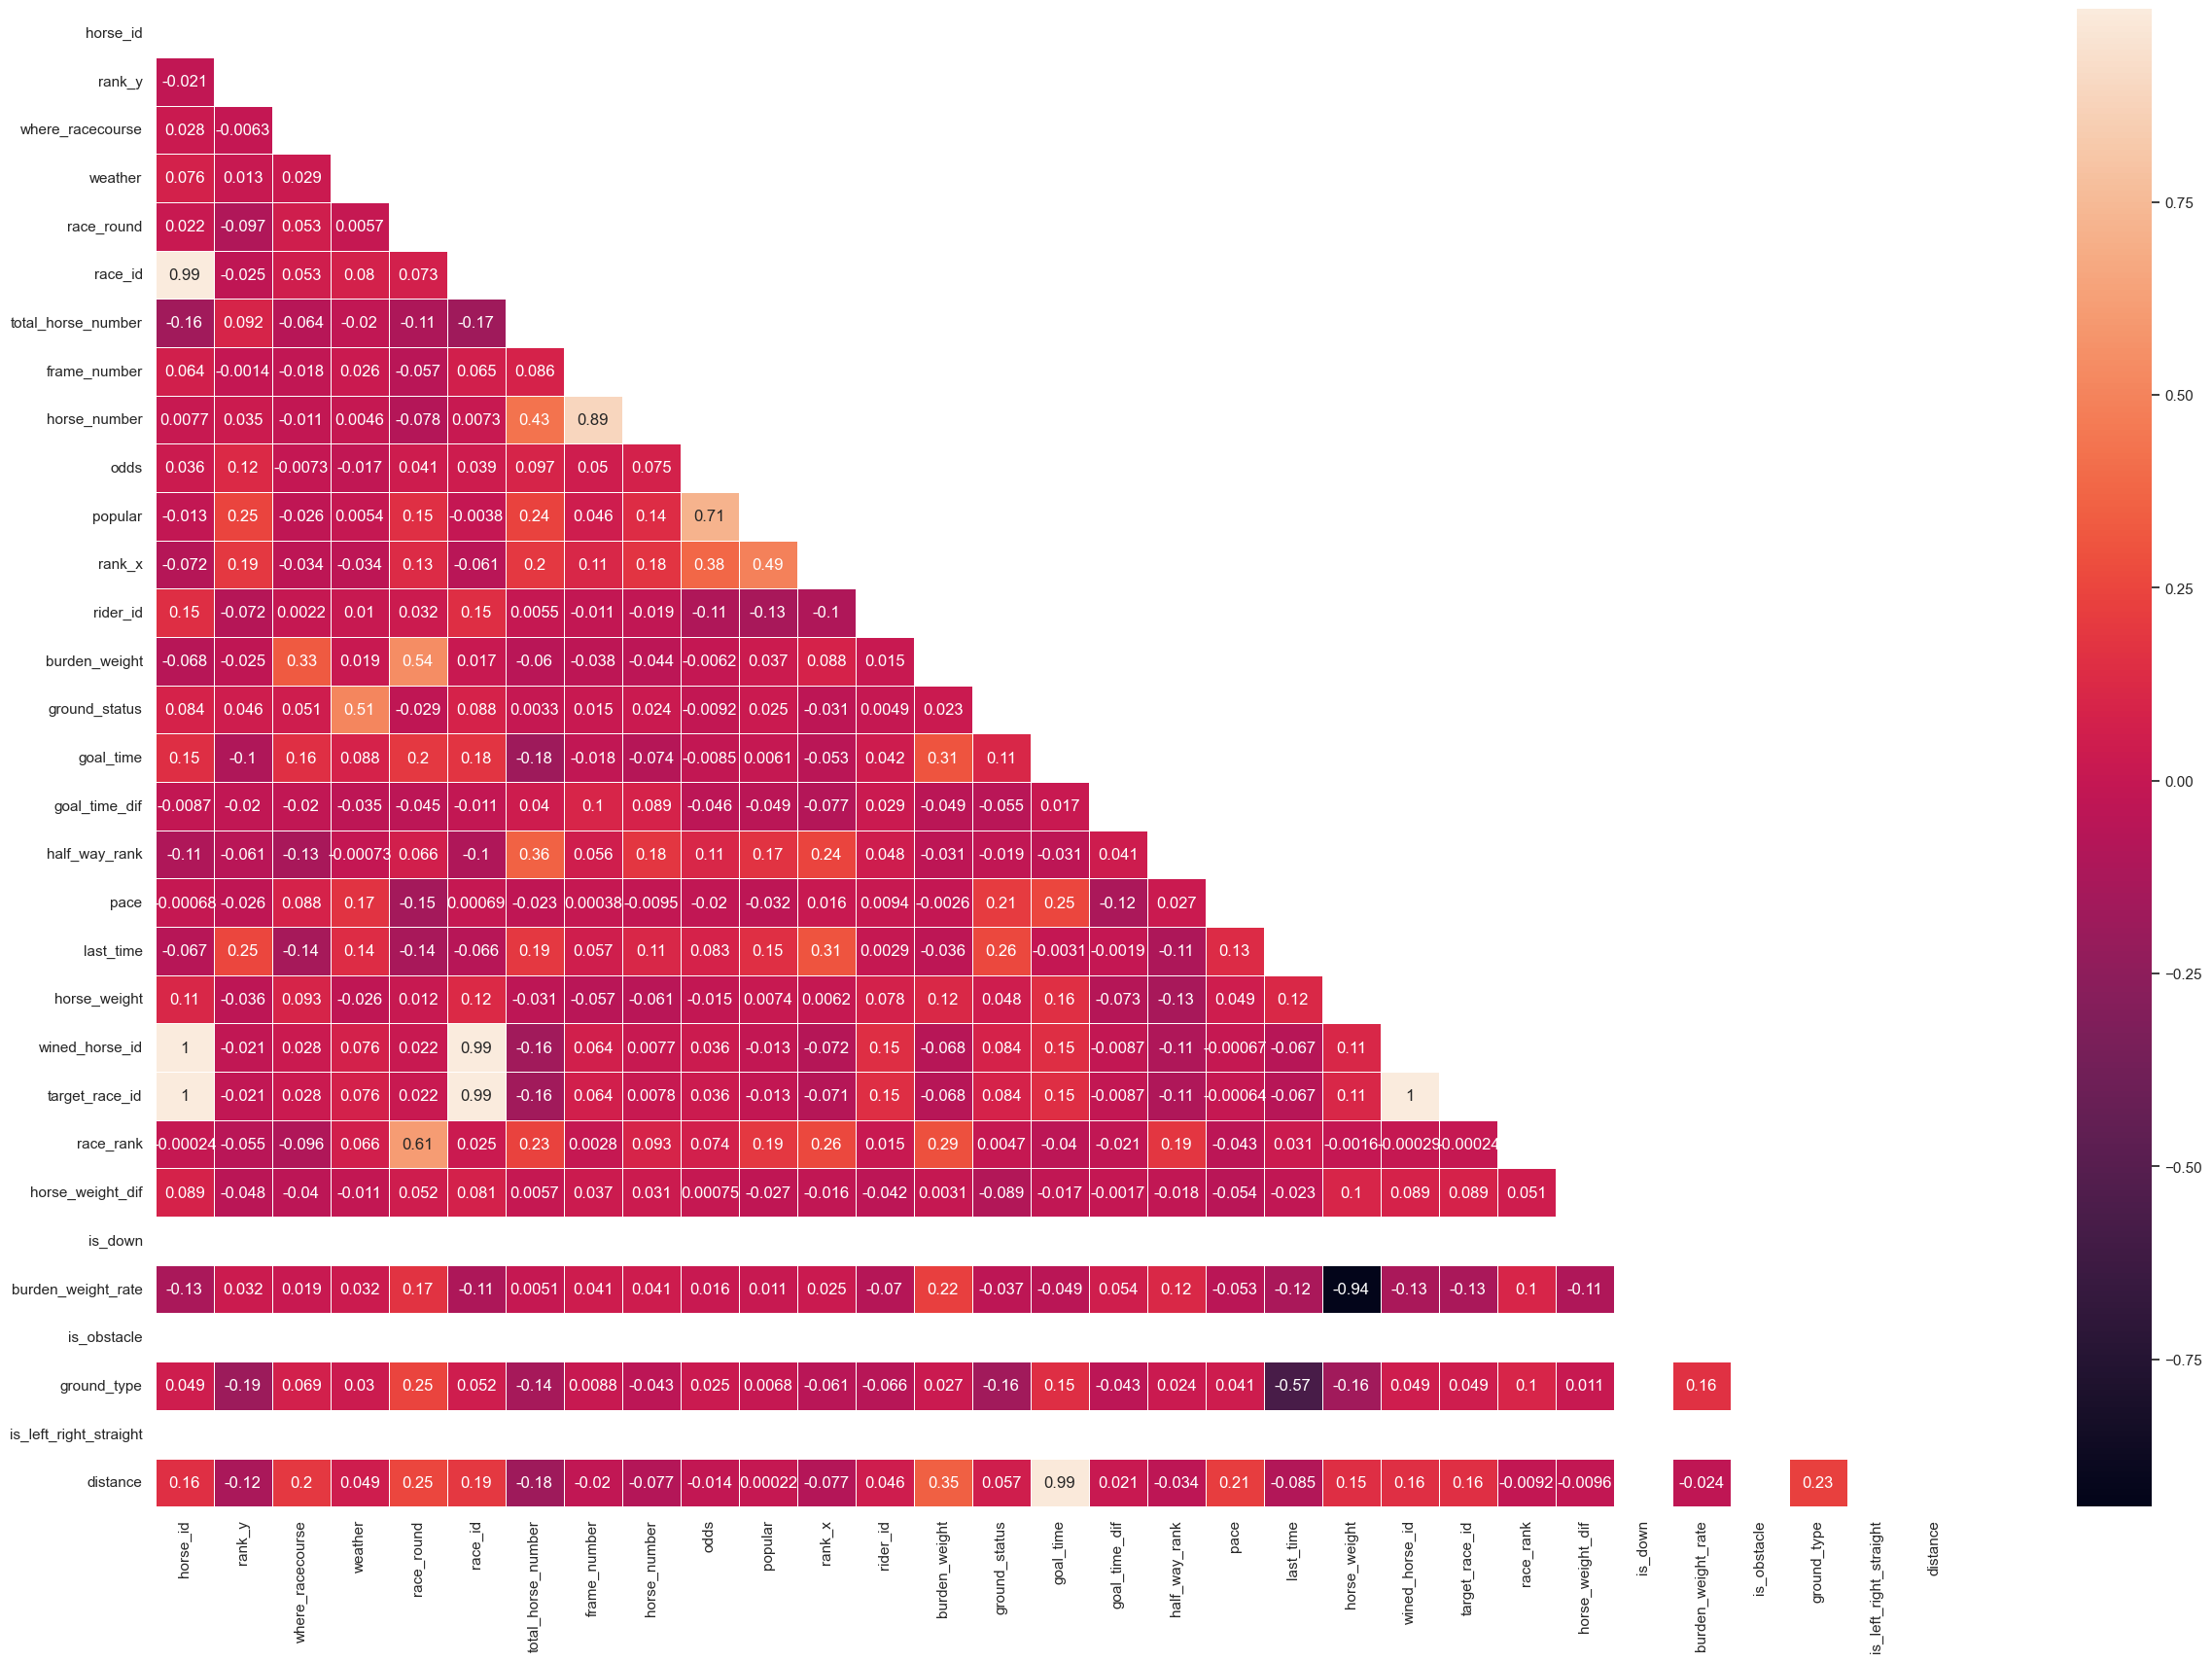

In [260]:
import seaborn as sns
sns.set(rc={'figure.figsize':(30,20)})
sns.set(style="white")
corr = horse_race_df_marged.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data = corr, mask = mask, linewidth = 0.5, annot = True)

In [257]:
#id系やいらないカラムを削除
horse_race_df_marged_droped = horse_race_df_marged.drop(['horse_id', 
                                                          'race_id',
                                                          'rider_id',
                                                          'wined_horse_id',
                                                          'target_race_id',
                                                          'is_down',
                                                          'is_obstacle',
                                                          'is_left_right_straight'],
                                                          axis=1
                                                          )

C:\Users\kawam\AppData\Local\Temp\ipykernel_32668\595357240.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = horse_race_df_marged_droped.corr()


<Axes: >

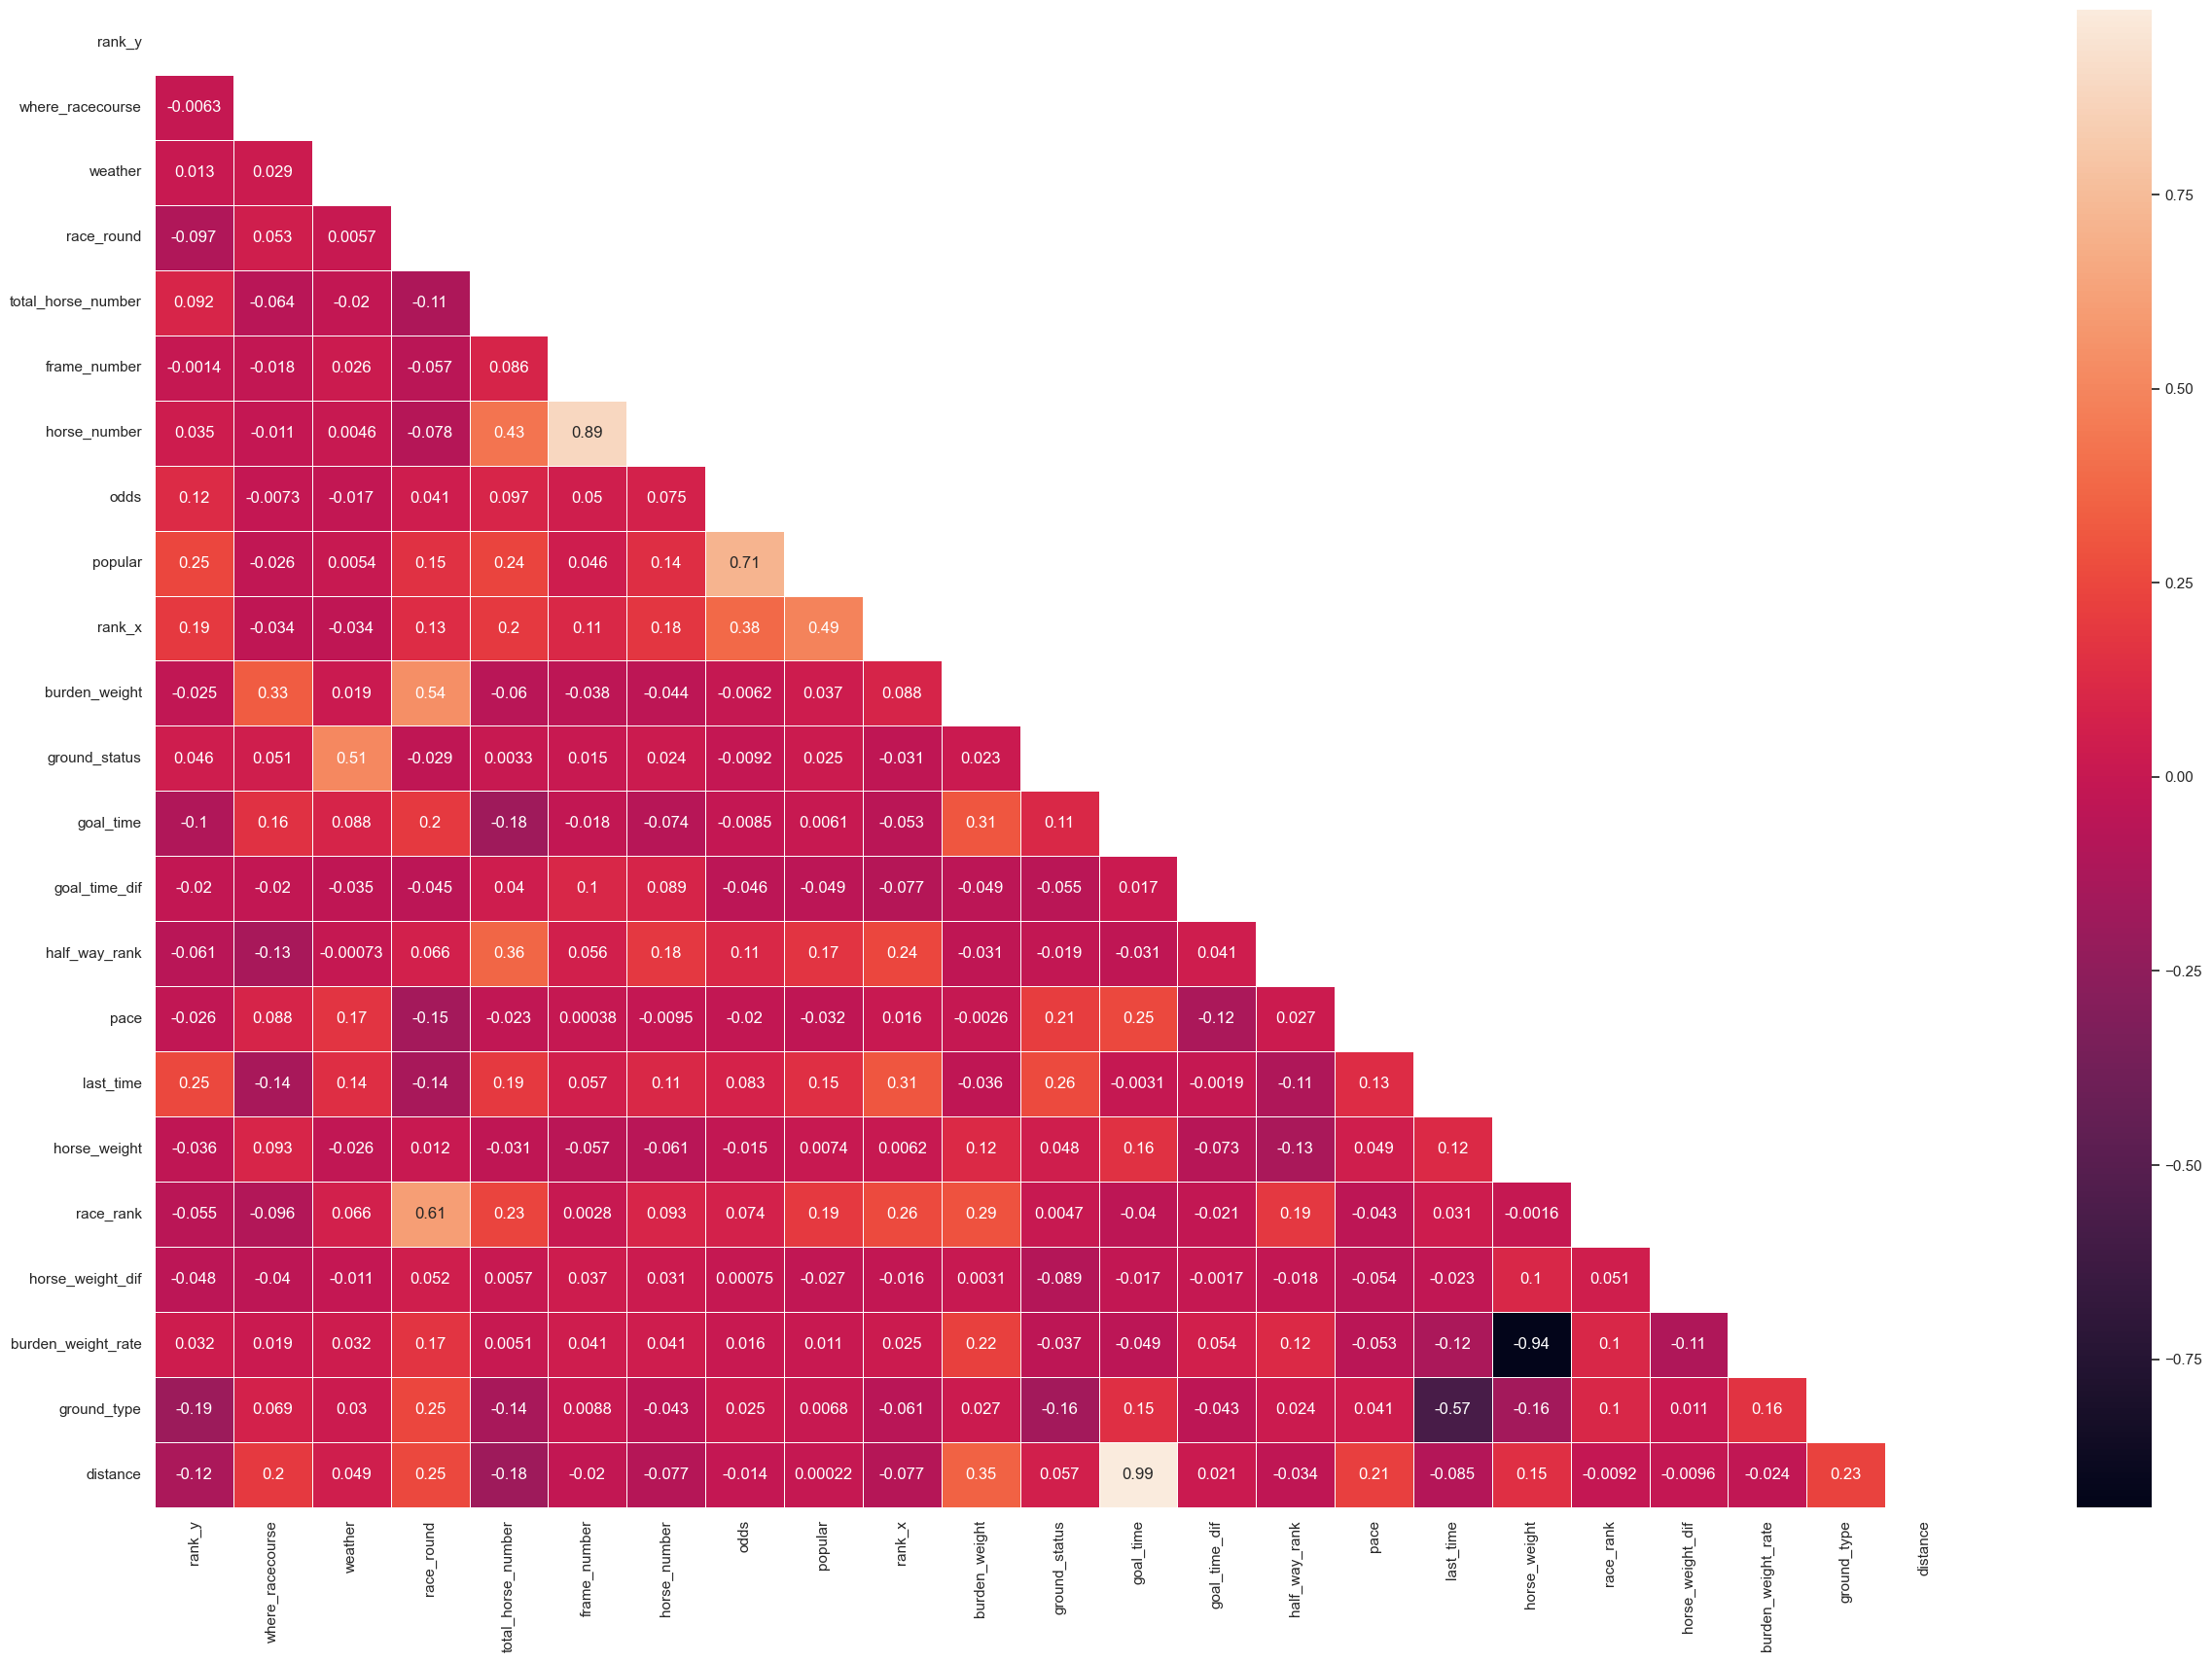

In [261]:
import seaborn as sns
sns.set(rc={'figure.figsize':(30,20)})
sns.set(style="white")
corr = horse_race_df_marged_droped.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data = corr, mask = mask, linewidth = 0.5, annot = True)